In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbrn

## Reading in the file 

In [3]:
inputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics"

fileName = r"\ProductAnalytics.xlsx"

client_usage = pd.read_excel(inputDir+fileName, sheet_name = "Sheet1")

### Exploring both data sets  

In [4]:
client_usage.head()

,CLIENTID,WEEK,LEGACYCODINGACTIONS,NEWCODINGACTIONS,LEGACYAPPEALACTIONS,NEWAPPEALACTIONS,Adoption
0,6,2017-11-13,3,0,0,0,NaN
1,6,2017-11-13,9,0,2,0,NaN
2,36,2017-11-13,7,0,0,0,NaN
3,36,2017-11-13,42,0,0,0,NaN
4,51,2017-11-13,6,0,0,0,NaN


In [5]:
client_usage.shape

(13878, 7)

In [6]:
client_usage.columns

Index(['CLIENTID', 'WEEK', 'LEGACYCODINGACTIONS', 'NEWCODINGACTIONS',
       'LEGACYAPPEALACTIONS', 'NEWAPPEALACTIONS', 'Adoption'],
      dtype='object')

In [7]:
## There are duplicate ClientIDs 
## Possibly due to multiple accounts in the same company performing those actions. 

## Grouping by to get the total for each client-week combination 

client_usage_grouped = client_usage.groupby(['CLIENTID', 'WEEK'], as_index=False)['LEGACYCODINGACTIONS','NEWCODINGACTIONS','LEGACYAPPEALACTIONS','NEWAPPEALACTIONS','Adoption'].sum()

In [8]:
client_usage_grouped.head()

,CLIENTID,WEEK,LEGACYCODINGACTIONS,NEWCODINGACTIONS,LEGACYAPPEALACTIONS,NEWAPPEALACTIONS,Adoption
0,6,2017-11-13,12,0,2,0,NaN
1,6,2017-11-20,40,0,1,0,NaN
2,6,2017-11-27,49,2,9,0,NaN
3,6,2017-12-04,27,0,3,0,NaN
4,6,2017-12-11,60,0,2,0,NaN


In [9]:
client_usage_grouped.describe()

,CLIENTID,LEGACYCODINGACTIONS,NEWCODINGACTIONS,LEGACYAPPEALACTIONS,NEWAPPEALACTIONS,Adoption
count,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,0.0
mean,2318.391428,87.570714,7.672806,4.377785,1.575375,NaN
std,2463.757200,399.150782,53.014770,26.527795,8.798373,NaN
min,6.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1307.000000,2.000000,0.000000,0.000000,0.000000,NaN
50%,1924.000000,8.000000,0.000000,0.000000,0.000000,NaN
75%,2569.000000,31.000000,0.000000,1.000000,0.000000,NaN
max,16228.000000,9205.000000,1301.000000,1205.000000,196.000000,NaN


#### Mean is higher than Median for all actions. Suggests data is Right Skewed. 
#### Massive difference between 75%th percentile and max
#### Both data points suggest outliers

## To Check for Outliers

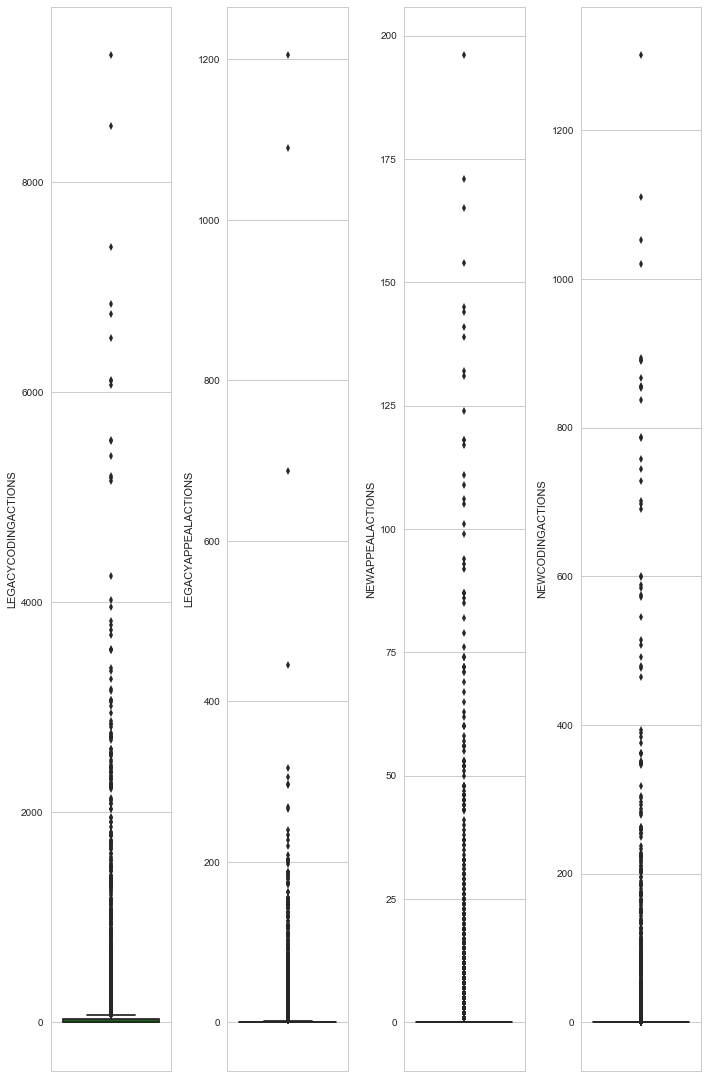

In [262]:
l = ['LEGACYCODINGACTIONS', 'LEGACYAPPEALACTIONS', 'NEWAPPEALACTIONS', 'NEWCODINGACTIONS']
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(10,60))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sbrn.set_style('whitegrid')
    sbrn.boxplot(client_usage_grouped[l[i]],color='green',orient='v')
    plt.tight_layout()
    
plt.show()

In [10]:
## Reading in second sheet 

fileDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\DemographicsData.xlsx"

client_demographics_data = pd.read_excel(fileDir, sheet_name = "Sheet2")

In [11]:
client_demographics_data.head()

,CLIENTID,OVERALLSTATUS,CLIENTSPECIALTY,CLIENTSIZE
0,78,Live,Dermatology,Large
1,78,Live,Dermatology,Large
2,78,Live,Dermatology,Large
3,78,Live,Dermatology,Large
4,78,Live,Dermatology,Large


In [12]:
client_demographics_data.shape

(13878, 4)

In [13]:
client_demographics_data.columns

Index(['CLIENTID', 'OVERALLSTATUS', 'CLIENTSPECIALTY', 'CLIENTSIZE'], dtype='object')

In [14]:
client_demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13878 entries, 0 to 13877
Data columns (total 4 columns):
CLIENTID           13878 non-null int64
OVERALLSTATUS      13878 non-null object
CLIENTSPECIALTY    13878 non-null object
CLIENTSIZE         13878 non-null object
dtypes: int64(1), object(3)
memory usage: 433.8+ KB


In [15]:
## Duplicates exist in demographics data as well. 
## Possible combination of individual Client ID, Week and "PersonID"

## Grouping by to create unique fields 

client_demographics_grouped = client_demographics_data.drop_duplicates(subset=None, keep='first',inplace=False)

In [16]:
client_demographics_grouped.head()

,CLIENTID,OVERALLSTATUS,CLIENTSPECIALTY,CLIENTSIZE
0,78,Live,Dermatology,Large
21,90,Live,Dermatology,Large
59,147,Live,Dermatology,Large
68,252,Live,Dermatology,Large
93,323,Live,Dermatology,Large


In [17]:
## Combining the two data sets to connect info 

combo_client_data = pd.merge(client_usage_grouped, client_demographics_grouped, how='inner')

In [18]:
print(combo_client_data[0:10])

   CLIENTID       WEEK  LEGACYCODINGACTIONS  NEWCODINGACTIONS  \
0         6 2017-11-13                   12                 0   
1         6 2017-11-20                   40                 0   
2         6 2017-11-27                   49                 2   
3         6 2017-12-04                   27                 0   
4         6 2017-12-11                   60                 0   
5         6 2017-12-18                   46                 1   
6         6 2017-12-25                   54                 2   
7         6 2018-01-01                   27                 1   
8         6 2018-01-08                   35                 0   
9        13 2017-11-20                   23                 0   

   LEGACYAPPEALACTIONS  NEWAPPEALACTIONS  Adoption OVERALLSTATUS  \
0                    2                 0       NaN          Live   
1                    1                 0       NaN          Live   
2                    9                 0       NaN          Live   
3           

## Sample Statistics 

### Before jumping into Exploring the usage, need to figure out distribution of our sample 

In [19]:
## Visualizing the breakdown of the sample size by Size, Speciality and status

combo_client_data_wo_week = combo_client_data.groupby(['CLIENTID','OVERALLSTATUS','CLIENTSPECIALTY','CLIENTSIZE']
                                                      , as_index=False)['LEGACYCODINGACTIONS','LEGACYAPPEALACTIONS'
                                                                        ,'NEWAPPEALACTIONS','NEWCODINGACTIONS','Adoption'].sum()


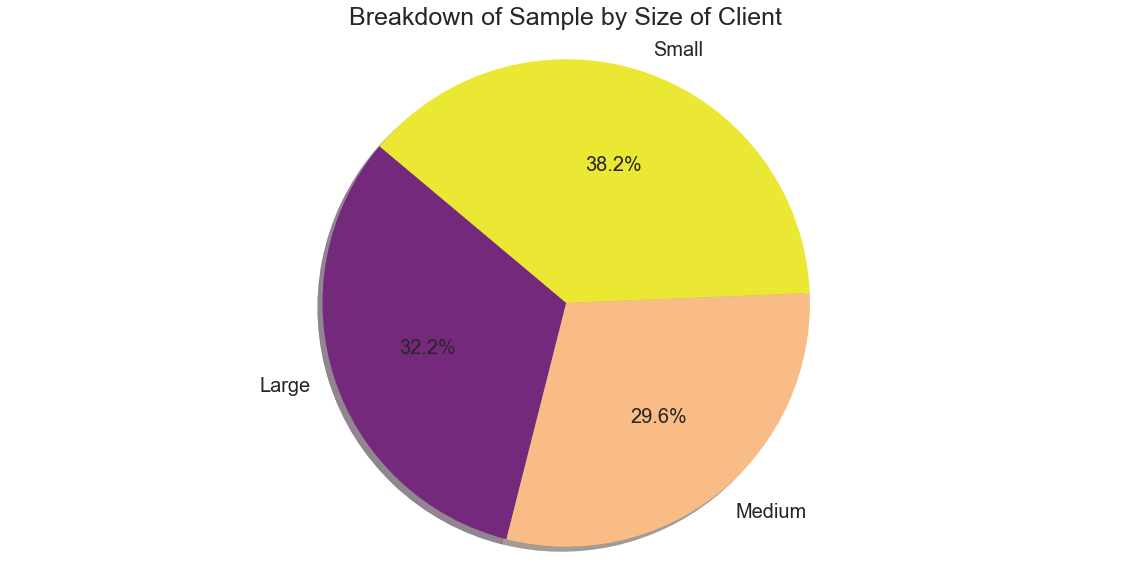

In [326]:
## Seeing the distribution of Sample by Size
combo_client_data_bysize = combo_client_data_wo_week.groupby("CLIENTSIZE")
combo_client_data_bysize = combo_client_data_bysize.agg({"CLIENTID": "nunique"})
combo_client_data_bysize = combo_client_data_bysize.reset_index()

fig, ax = plt.subplots(figsize=(20,10))

size = []
for i in combo_client_data_bysize['CLIENTID']:
    size.append(i)
    
labels = []
for i in combo_client_data_bysize['CLIENTSIZE']:
    labels.append(i)

wedges, texts, autotext = ax.pie(size, labels= labels, colors= ['#75297C','#f9bc86','#ebe834'],autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Breakdown of Sample by Size of Client', fontsize = 25)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
autotext[0].set_fontsize(20)
autotext[1].set_fontsize(20)
autotext[2].set_fontsize(20)
plt.axis("equal")

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\SampleBySize.png"

#Save Graph
plt.savefig(outputDir+fileName)

plt.show()




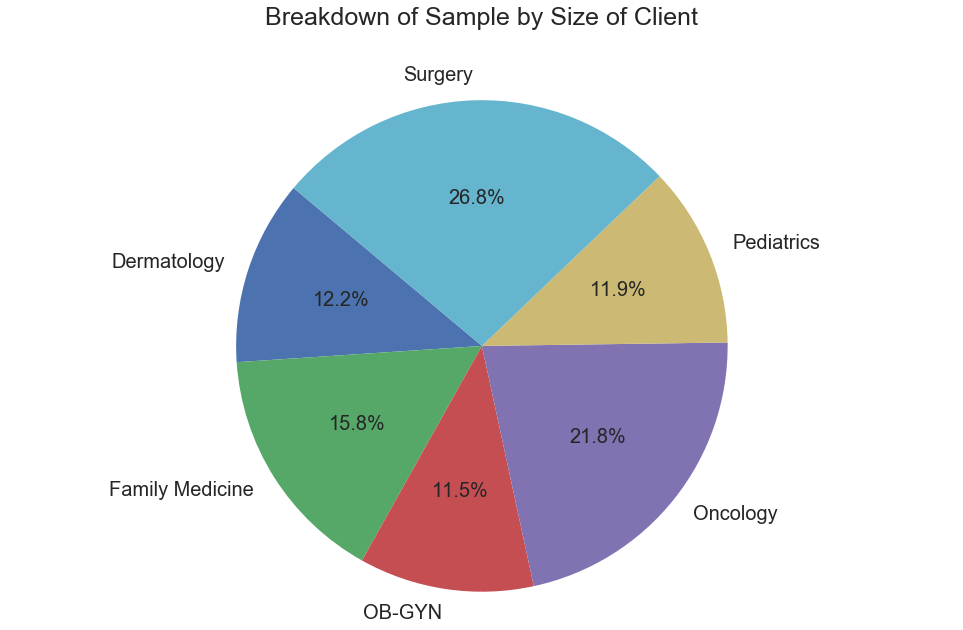

In [20]:
## Seeing the distribution of Sample by Speciality 
## Seeing the distribution of Sample by Size
combo_client_data_byspec = combo_client_data_wo_week.groupby("CLIENTSPECIALTY")
combo_client_data_byspec = combo_client_data_byspec.agg({"CLIENTID": "nunique"})
combo_client_data_byspec = combo_client_data_byspec.reset_index()

fig, ax = plt.subplots(figsize=(17,10))

size = []
for i in combo_client_data_byspec['CLIENTID']:
    size.append(i)
    
labels = []
for i in combo_client_data_byspec['CLIENTSPECIALTY']:
    labels.append(i)

wedges, texts, autotext = ax.pie(size, labels= labels,autopct='%1.1f%%', startangle=140)

plt.title('Breakdown of Sample by Size of Client', fontsize = 25, y= 1.08)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
texts[3].set_fontsize(20)
texts[4].set_fontsize(20)
texts[5].set_fontsize(20)
autotext[0].set_fontsize(20)
autotext[1].set_fontsize(20)
autotext[2].set_fontsize(20)
autotext[3].set_fontsize(20)
autotext[4].set_fontsize(20)
autotext[5].set_fontsize(20)
plt.axis("equal")

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\SampleBySpeciality.png"

#Save Graph
plt.savefig(outputDir+fileName)

plt.show()


In [336]:
## Output for Final Summary Statistics

combo_client_data_summary = combo_client_data_wo_week.groupby(['CLIENTSIZE','CLIENTSPECIALTY','OVERALLSTATUS'])
combo_client_data_summary = combo_client_data_summary.agg({"CLIENTID": "nunique"})
combo_client_data_summary = combo_client_data_summary.reset_index()

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\OverallSampleStatistics.xlsx"

combo_client_data_summary.to_excel(outputDir+fileName)

## Exploratory Analysis 

In [121]:
## Scenario 1: Seeing if there is any relationship between size of the company and usage

## Group data to see how the size of the client impacts usage 

combo_data_bysize = combo_client_data.groupby('CLIENTSIZE', as_index=False)['LEGACYCODINGACTIONS','NEWCODINGACTIONS','LEGACYAPPEALACTIONS','NEWAPPEALACTIONS'].sum()

In [122]:
combo_data_bysize.head()

,CLIENTSIZE,LEGACYCODINGACTIONS,NEWCODINGACTIONS,LEGACYAPPEALACTIONS,NEWAPPEALACTIONS
0,Large,176246,11420,8733,3897
1,Medium,372552,41284,17179,6570
2,Small,221474,14786,12595,3390


In [31]:
## Seeing how many clients used it for 6 weeks 

combo_analysis = combo_client_data.copy()

combo_analysis["UsedNew"] = np.where((combo_analysis["NEWAPPEALACTIONS"]+combo_analysis["NEWCODINGACTIONS"])>0,"Used","NotUsed")

combo_analysis_used = combo_analysis.loc[combo_analysis["UsedNew"]=="Used",:].copy()

combo_analysis_used_groupcount = combo_analysis_used.groupby('CLIENTID', as_index=False)['WEEK'].count()

combo_analysis_used.head()

,CLIENTID,WEEK,LEGACYCODINGACTIONS,NEWCODINGACTIONS,LEGACYAPPEALACTIONS,NEWAPPEALACTIONS,Adoption,OVERALLSTATUS,CLIENTSPECIALTY,CLIENTSIZE,UsedNew
2,6,2017-11-27,49,2,9,0,NaN,Live,Surgery,Small,Used
5,6,2017-12-18,46,1,2,0,NaN,Live,Surgery,Small,Used
6,6,2017-12-25,54,2,7,0,NaN,Live,Surgery,Small,Used
7,6,2018-01-01,27,1,2,0,NaN,Live,Surgery,Small,Used
12,13,2017-12-11,32,0,2,2,NaN,Live,OB-GYN,Medium,Used


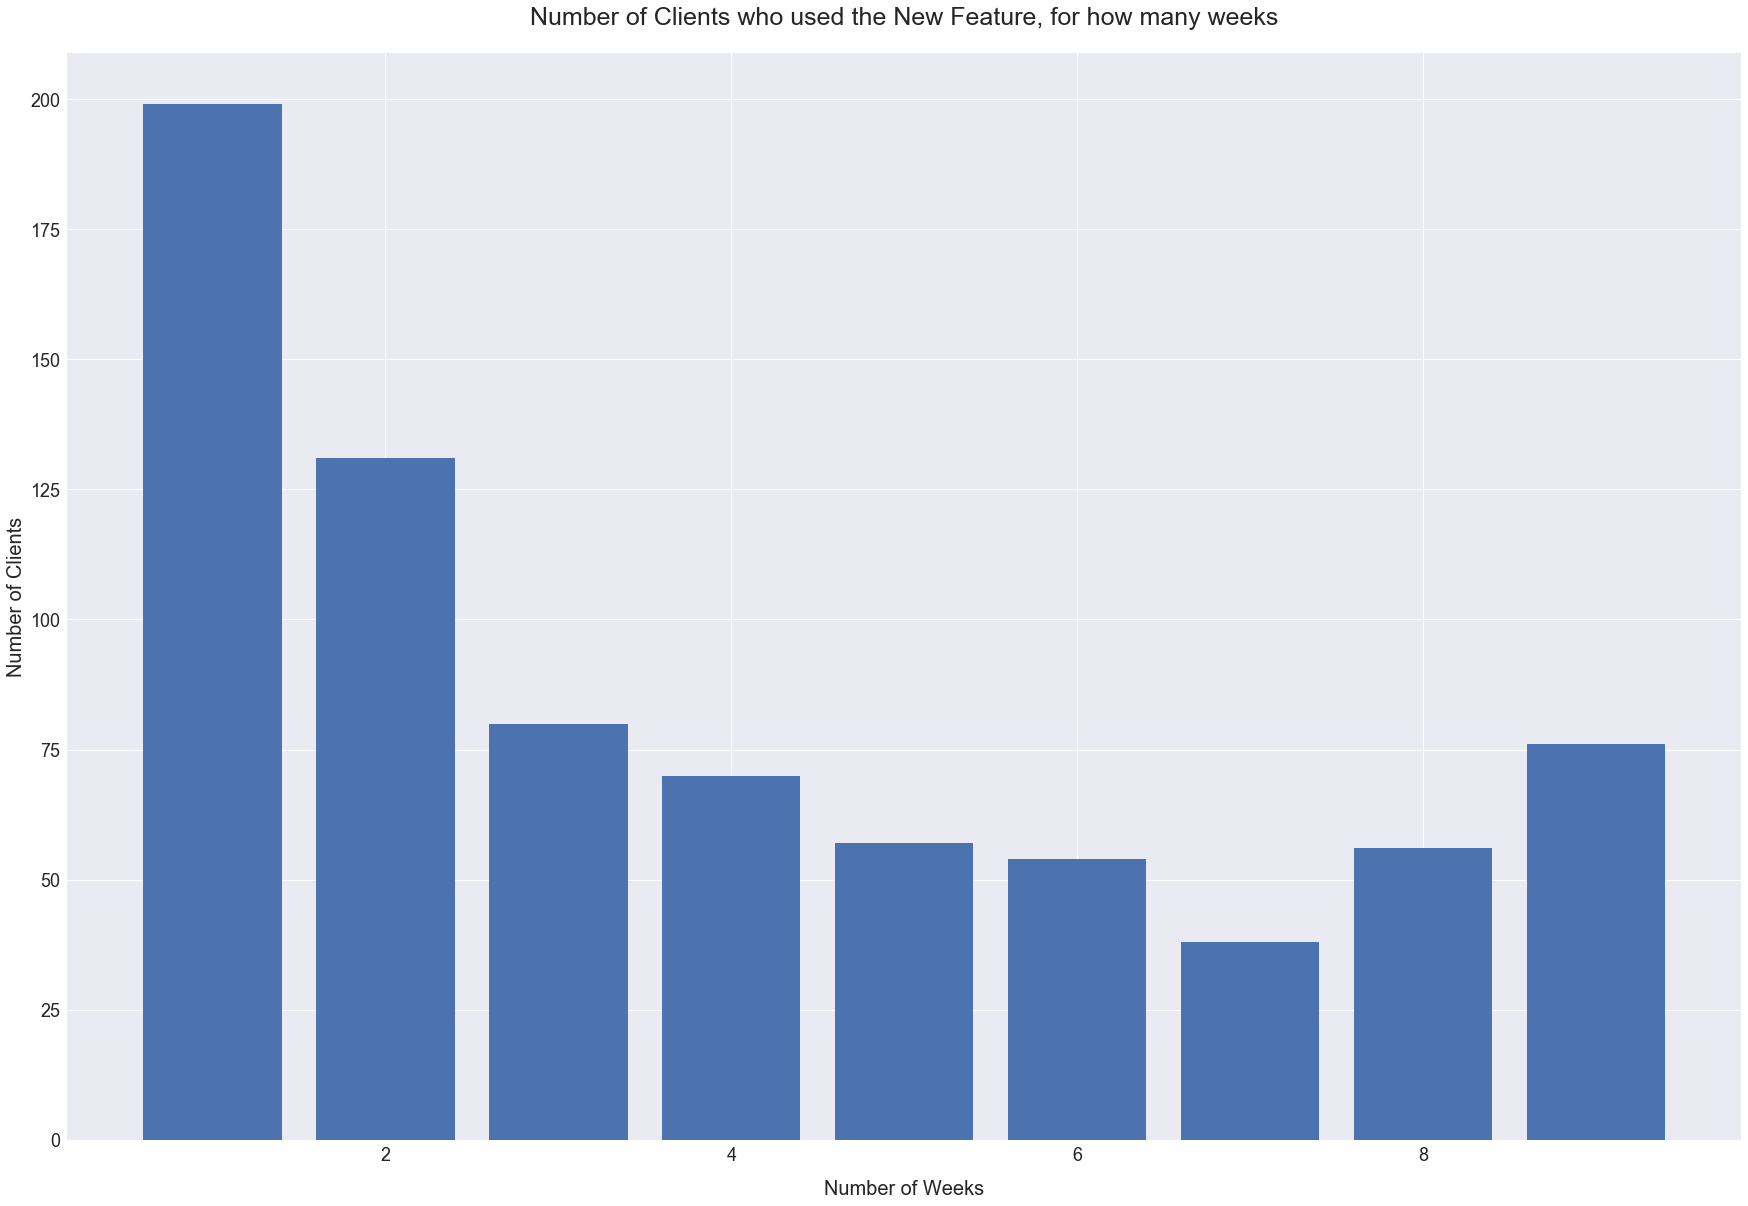

In [37]:
## Plotting all clients by number of weeks used

week_lenght = []
for i in range(1,len(combo_analysis['WEEK'].unique())+1):
    week_lenght.append(i)

# plot 

fig, ax = plt.subplots(figsize=(30,20))

y_axis = []
for i in week_lenght:
    x = sum(1 for j in combo_analysis_used_groupcount['WEEK'] if j == i)
    y_axis.append(x)
    
ax.bar(week_lenght, y_axis)
plt.title('Number of Clients who used the New Feature, for how many weeks', fontsize = 25, y= 1.02)
plt.xlabel("Number of Weeks", fontsize = 20, labelpad = 15)
plt.ylabel("Number of Clients", fontsize = 20)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\NumberofClientsWeeks.png"

#Save Graph
plt.savefig(outputDir+fileName)
plt.show()
plt.show()

In [198]:
# From raw value to percentage
totals_coding = [i+j for i,j in zip(combo_data_bysize['LEGACYCODINGACTIONS'], combo_data_bysize['NEWCODINGACTIONS'])]
greenBars_coding = [i / j * 100 for i,j in zip(combo_data_bysize['LEGACYCODINGACTIONS'], totals_coding)]
orangeBars_coding = [i / j * 100 for i,j in zip(combo_data_bysize['NEWCODINGACTIONS'], totals_coding)]



fig, ax = plt.subplots(1,1, figsize=(20,10))

r = []
for i in range(0,len(combo_data_bysize['CLIENTSIZE'])):
    r.append(i)

#plots 
barWidth = 0.85

ax.bar(r, greenBars_coding, color= '#75297C', edgecolor='white', width=barWidth, label="Legacy Coding Actions")
ax.bar(r, orangeBars_coding, bottom=greenBars_coding, color='#f9bc86', edgecolor='white', width=barWidth, label="New Coding Actions")

legend = ax.legend(loc="upper left", fontsize = 18, bbox_to_anchor=(0.2,-0.1), ncol=2)
plt.title('% Breakdown of Coding Actions type by Size of the Company', fontsize = 18, y= 1.02)
plt.xticks(r, combo_data_bysize['CLIENTSIZE'])
plt.xlabel("Client Size", fontsize = 15, labelpad = 15)
plt.ylabel("Coding Actions Taken", fontsize = 15)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\CodingActionBySize.png"

#Save Graph
plt.savefig(outputDir+fileName)


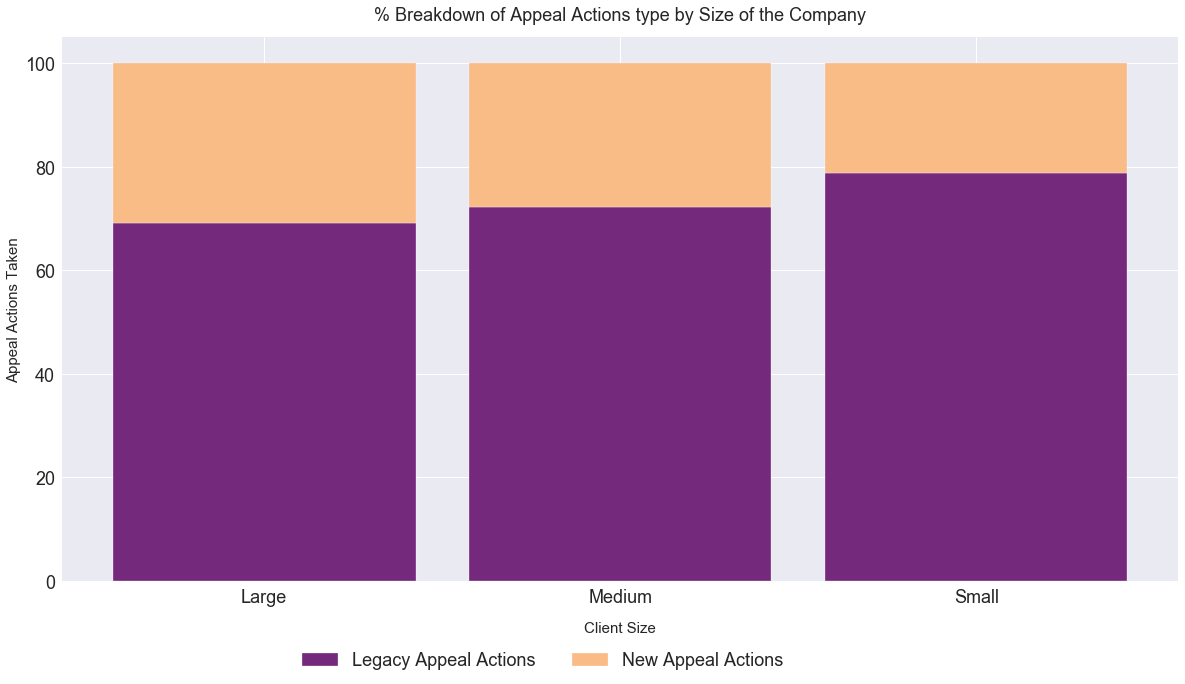

In [197]:
# Appeal Actions
totals_appeal = [i+j for i,j in zip(combo_data_bysize['LEGACYAPPEALACTIONS'], combo_data_bysize['NEWAPPEALACTIONS'])]
greenBars_appeal = [i / j * 100 for i,j in zip(combo_data_bysize['LEGACYAPPEALACTIONS'], totals_appeal)]
orangeBars_appeal = [i / j * 100 for i,j in zip(combo_data_bysize['NEWAPPEALACTIONS'], totals_appeal)]

fig, ax = plt.subplots(1,1, figsize=(20,10))

r = []
for i in range(0,len(combo_data_bysize['CLIENTSIZE'])):
    r.append(i)

#plots 
barWidth = 0.85

ax.bar(r, greenBars_appeal, color= '#75297C', edgecolor='white', width=barWidth, label="Legacy Appeal Actions")
ax.bar(r, orangeBars_appeal, bottom=greenBars_appeal, color='#f9bc86', edgecolor='white', width=barWidth, label="New Appeal Actions")

legend = ax.legend(loc="upper left", fontsize = 18, bbox_to_anchor=(0.2,-0.1), ncol=2)
plt.title('% Breakdown of Appeal Actions type by Size of the Company', fontsize = 18, y= 1.02)
plt.xticks(r, combo_data_bysize['CLIENTSIZE'])
plt.xlabel("Client Size", fontsize = 15, labelpad = 15)
plt.ylabel("Appeal Actions Taken", fontsize = 15)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\AppealActionBySize.png"

#Save Graph
plt.savefig(outputDir+fileName)
plt.show()

In [204]:
## Data for the two graphs 

combo_data_bysize['Legacy % of Total Coding Actions'] = combo_data_bysize['LEGACYCODINGACTIONS']/(combo_data_bysize['LEGACYCODINGACTIONS']+combo_data_bysize['NEWCODINGACTIONS'])
combo_data_bysize['New % of Total Coding Actions'] = combo_data_bysize['NEWCODINGACTIONS']/(combo_data_bysize['LEGACYCODINGACTIONS']+combo_data_bysize['NEWCODINGACTIONS'])
combo_data_bysize['Legacy % of Total Appeal Actions'] = combo_data_bysize['LEGACYAPPEALACTIONS']/(combo_data_bysize['LEGACYAPPEALACTIONS']+combo_data_bysize['NEWAPPEALACTIONS'])
combo_data_bysize['New % of Total Appeal Actions'] = combo_data_bysize['NEWAPPEALACTIONS']/(combo_data_bysize['LEGACYAPPEALACTIONS']+combo_data_bysize['NEWAPPEALACTIONS'])

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"
fileName = "/ActionsTakenByClientSize.xlsx"

combo_data_bysize.to_excel(outputDir+fileName, index=False)



In [213]:
## Scenario 2: Finding relationships between type of company and usage

combo_data_bytype = combo_client_data.groupby('CLIENTSPECIALTY', as_index=False)['LEGACYCODINGACTIONS','NEWCODINGACTIONS','LEGACYAPPEALACTIONS','NEWAPPEALACTIONS'].sum()

combo_data_bytype.head()

,CLIENTSPECIALTY,LEGACYCODINGACTIONS,NEWCODINGACTIONS,LEGACYAPPEALACTIONS,NEWAPPEALACTIONS
0,Dermatology,92019,5339,3712,930
1,Family Medicine,39586,2015,2594,729
2,OB-GYN,113948,11650,5737,2542
3,Oncology,85964,6312,5233,2993
4,Pediatrics,217381,25768,9595,3711


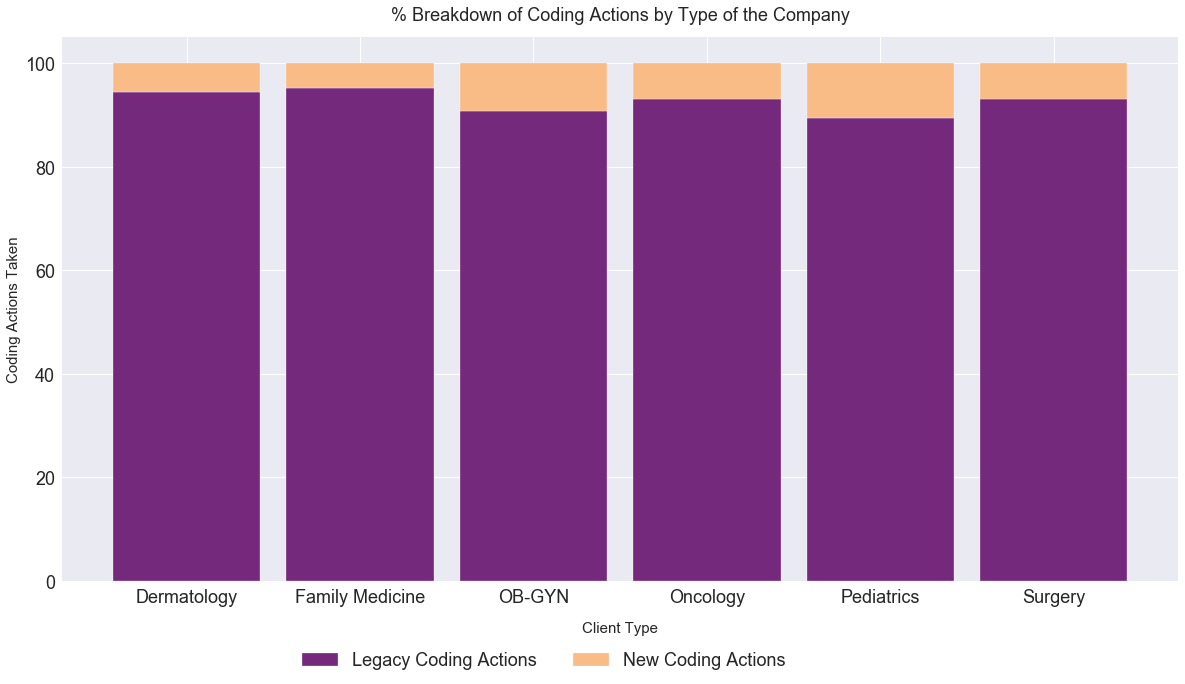

In [217]:
## Plotting type and Coding Actions
# Appeal Actions
totals_coding = [i+j for i,j in zip(combo_data_bytype['LEGACYCODINGACTIONS'], combo_data_bytype['NEWCODINGACTIONS'])]
greenBars_coding = [i / j * 100 for i,j in zip(combo_data_bytype['LEGACYCODINGACTIONS'], totals_coding)]
orangeBars_coding = [i / j * 100 for i,j in zip(combo_data_bytype['NEWCODINGACTIONS'], totals_coding)]

fig, ax = plt.subplots(1,1, figsize=(20,10))

r = []
for i in range(0,len(combo_data_bytype['CLIENTSPECIALTY'])):
    r.append(i)

#plots 
barWidth = 0.85

ax.bar(r, greenBars_coding, color= '#75297C', edgecolor='white', width=barWidth, label="Legacy Coding Actions")
ax.bar(r, orangeBars_coding, bottom=greenBars_coding, color='#f9bc86', edgecolor='white', width=barWidth, label="New Coding Actions")

legend = ax.legend(loc="upper left", fontsize = 18, bbox_to_anchor=(0.2,-0.1), ncol=2)
plt.title('% Breakdown of Coding Actions by Type of the Company', fontsize = 18, y= 1.02)
plt.xticks(r, combo_data_bytype['CLIENTSPECIALTY'])
plt.xlabel("Client Type", fontsize = 15, labelpad = 15)
plt.ylabel("Coding Actions Taken", fontsize = 15)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\CodingActionsbyType.png"

#Save Graph
plt.savefig(outputDir+fileName)
plt.show()


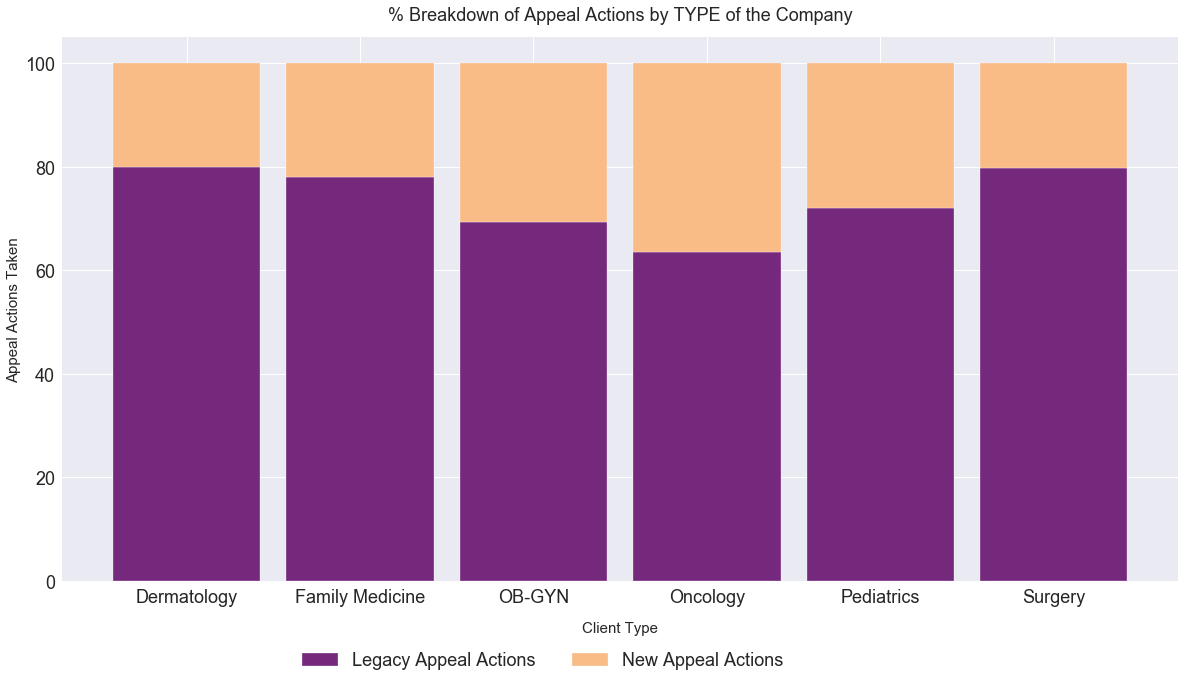

In [222]:
# Appeal Actions
totals_appeal = [i+j for i,j in zip(combo_data_bytype['LEGACYAPPEALACTIONS'], combo_data_bytype['NEWAPPEALACTIONS'])]
greenBars_appeal = [i / j * 100 for i,j in zip(combo_data_bytype['LEGACYAPPEALACTIONS'], totals_appeal)]
orangeBars_appeal = [i / j * 100 for i,j in zip(combo_data_bytype['NEWAPPEALACTIONS'], totals_appeal)]

fig, ax = plt.subplots(1,1, figsize=(20,10))

r = []
for i in range(0,len(combo_data_bytype['CLIENTSPECIALTY'])):
    r.append(i)

#plots 
barWidth = 0.85

ax.bar(r, greenBars_appeal, color= '#75297C', edgecolor='white', width=barWidth, label="Legacy Appeal Actions")
ax.bar(r, orangeBars_appeal, bottom=greenBars_appeal, color='#f9bc86', edgecolor='white', width=barWidth, label="New Appeal Actions")

legend = ax.legend(loc="upper left", fontsize = 18, bbox_to_anchor=(0.2,-0.1), ncol=2)
plt.title('% Breakdown of Appeal Actions by TYPE of the Company', fontsize = 18, y= 1.02)
plt.xticks(r, combo_data_bytype['CLIENTSPECIALTY'])
plt.xlabel("Client Type", fontsize = 15, labelpad = 15)
plt.ylabel("Appeal Actions Taken", fontsize = 15)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

fileName = r"\AppealActionByType.png"

#Save Graph
plt.savefig(outputDir+fileName)
plt.show()

In [224]:
## Storing the data for Type 

combo_data_bytype['Legacy % of Total Coding Actions'] = combo_data_bytype['LEGACYCODINGACTIONS']/(combo_data_bytype['LEGACYCODINGACTIONS']+combo_data_bytype['NEWCODINGACTIONS'])

combo_data_bytype['New % of Total Coding Actions'] = combo_data_bytype['NEWCODINGACTIONS']/(combo_data_bytype['LEGACYCODINGACTIONS']+combo_data_bytype['NEWCODINGACTIONS'])

combo_data_bytype['Legacy % of Total Appeal Actions'] = combo_data_bytype['LEGACYAPPEALACTIONS']/(combo_data_bytype['LEGACYAPPEALACTIONS']+combo_data_bytype['NEWAPPEALACTIONS'])

combo_data_bytype['New % of Total Appeal Actions'] = combo_data_bytype['NEWAPPEALACTIONS']/(combo_data_bytype['LEGACYAPPEALACTIONS']+combo_data_bytype['NEWAPPEALACTIONS'])

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"
fileName = "/ActionsTakenByClientType.xlsx"

combo_data_bytype.to_excel(outputDir+fileName, index=False)


## To Check Correlation 

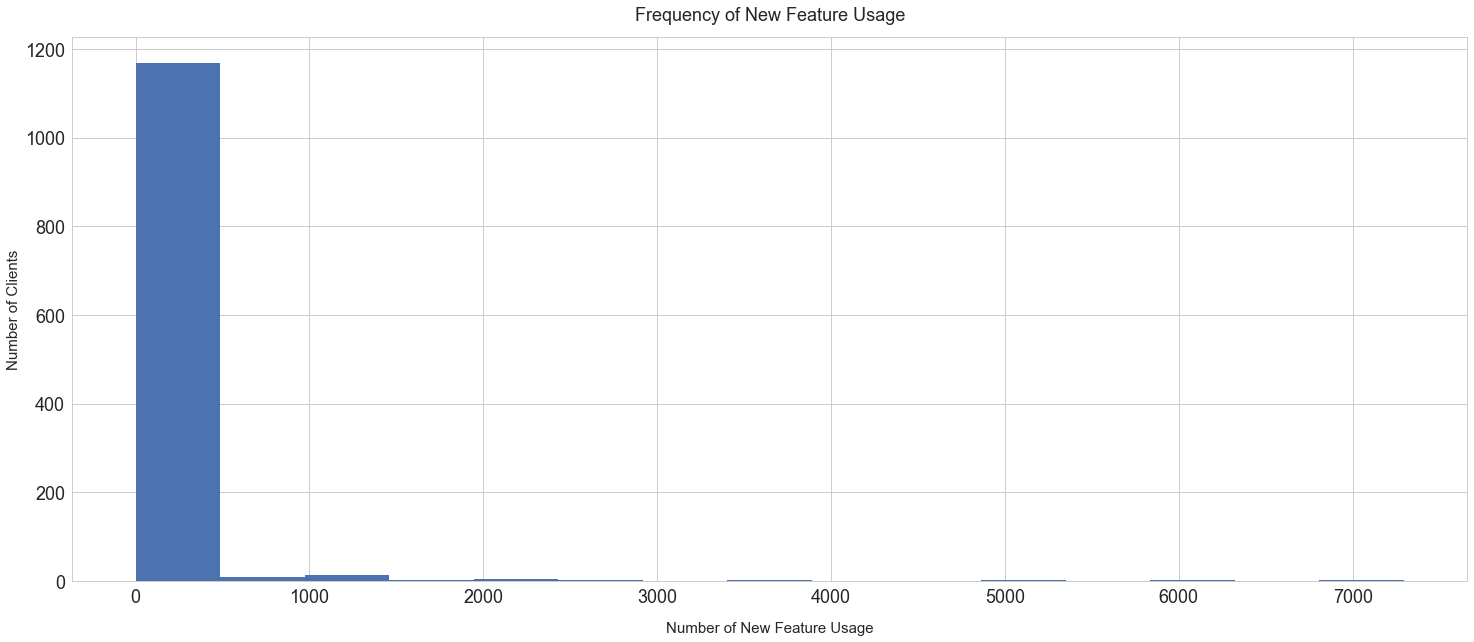

In [274]:
## Check correlation between size of companies and whether they are using the new feature or not

combo_data_noweek = combo_client_data.groupby(['CLIENTID','CLIENTSIZE','CLIENTSPECIALTY'], as_index=False)['NEWCODINGACTIONS','NEWAPPEALACTIONS'].sum()

combo_data_noweek['Total New Feature Usage'] = combo_data_noweek['NEWCODINGACTIONS']+combo_data_noweek['NEWAPPEALACTIONS']

number_of_bins = 15

fig, ax = plt.subplots(1,1,figsize = (25,10))

ax.hist(combo_data_noweek['Total New Feature Usage'], bins= number_of_bins)
#ax2.hist(combo_data_noweek['NEWCODINGACTIONS'], bins = number_of_bins)
#ax3.hist(combo_data_noweek['NEWAPPEALACTIONS'], bins = number_of_bins)


plt.title('Frequency of New Feature Usage', fontsize = 18, y= 1.02)
plt.xlabel("Number of New Feature Usage", fontsize = 15, labelpad = 15)
plt.ylabel("Number of Clients", fontsize = 15)
plt.tick_params(labelsize = 18)


plt.show()


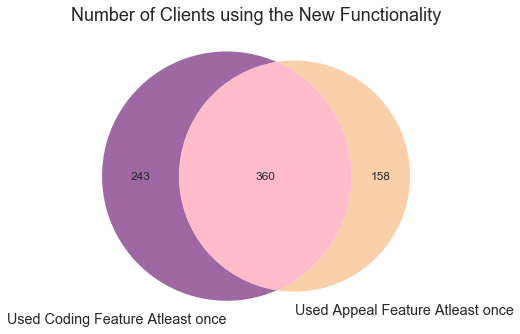

In [283]:
## Scenario 3: How many clients used this new technology 

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

venn2(subsets=(243,158,360), set_labels = ('Used Coding Feature Atleast once', 'Used Appeal Feature Atleast once')
     , set_colors = ('#75297C', '#f9bc86'), alpha = 0.7)

plt.title('Number of Clients using the New Functionality', fontsize =  18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"
fileName = "/VennDiagram.png"

plt.savefig(outputDir+fileName)

plt.show()

## Measuring Success of the new Feature

### Measuring two different set of KPIs based on Engagement and Retention

In [683]:
## Setting up data set 

kpi_data_byclient_week = combo_client_data.groupby(['CLIENTID','WEEK', 'CLIENTSIZE','CLIENTSPECIALTY'], as_index=False)['NEWAPPEALACTIONS',
                                                                                                                        'NEWCODINGACTIONS',
                                                                                                                        'LEGACYCODINGACTIONS',
                                                                                                                        'LEGACYAPPEALACTIONS'].sum()
kpi_data_byclient_week['Used New Feature (Y/N)'] = np.where((kpi_data_byclient_week['NEWAPPEALACTIONS']>0) | (kpi_data_byclient_week['NEWCODINGACTIONS']>0), "Y","N")
kpi_data_byclient_week['Didnt Use it at all'] = np.where((kpi_data_byclient_week['NEWAPPEALACTIONS']==0)&(kpi_data_byclient_week['NEWCODINGACTIONS']==0)&
                                                         (kpi_data_byclient_week['LEGACYCODINGACTIONS']==0)&(kpi_data_byclient_week['LEGACYAPPEALACTIONS']==0)
                                                         , "NoUse","Used")
kpi_data_byclient_week['TotalUsage'] = kpi_data_byclient_week['NEWAPPEALACTIONS']+kpi_data_byclient_week['NEWCODINGACTIONS']+kpi_data_byclient_week['LEGACYCODINGACTIONS']+kpi_data_byclient_week['LEGACYAPPEALACTIONS']
## Need to filter to Clients who used the new feature in that week 
kpi_data_byclient_user = kpi_data_byclient_week.loc[kpi_data_byclient_week['Used New Feature (Y/N)']=="Y",:].copy()

kpi_data_byclient_user['Rank_Of_Client'] = kpi_data_byclient_user.groupby('CLIENTID')['WEEK'].rank(method='first')
kpi_data_byclient_user['NewUser'] = np.where(kpi_data_byclient_user['Rank_Of_Client']==1, "New User", "Returning User")

print(kpi_data_byclient_week.loc[kpi_data_byclient_week['Didnt Use it at all']=='NoUse',:])

      CLIENTID       WEEK CLIENTSIZE  CLIENTSPECIALTY  NEWAPPEALACTIONS  \
39          66 2017-12-18     Medium           OB-GYN                 0   
70          83 2017-11-20     Medium           OB-GYN                 0   
136        172 2017-11-20     Medium           OB-GYN                 0   
137        172 2017-11-27     Medium           OB-GYN                 0   
139        172 2017-12-11     Medium           OB-GYN                 0   
191        209 2017-12-25      Small          Surgery                 0   
228        243 2017-11-27     Medium           OB-GYN                 0   
230        243 2017-12-11     Medium           OB-GYN                 0   
231        243 2017-12-18     Medium           OB-GYN                 0   
233        243 2018-01-01     Medium           OB-GYN                 0   
253        253 2017-12-04      Large         Oncology                 0   
358        394 2017-12-18      Large      Dermatology                 0   
360        400 2017-12-18

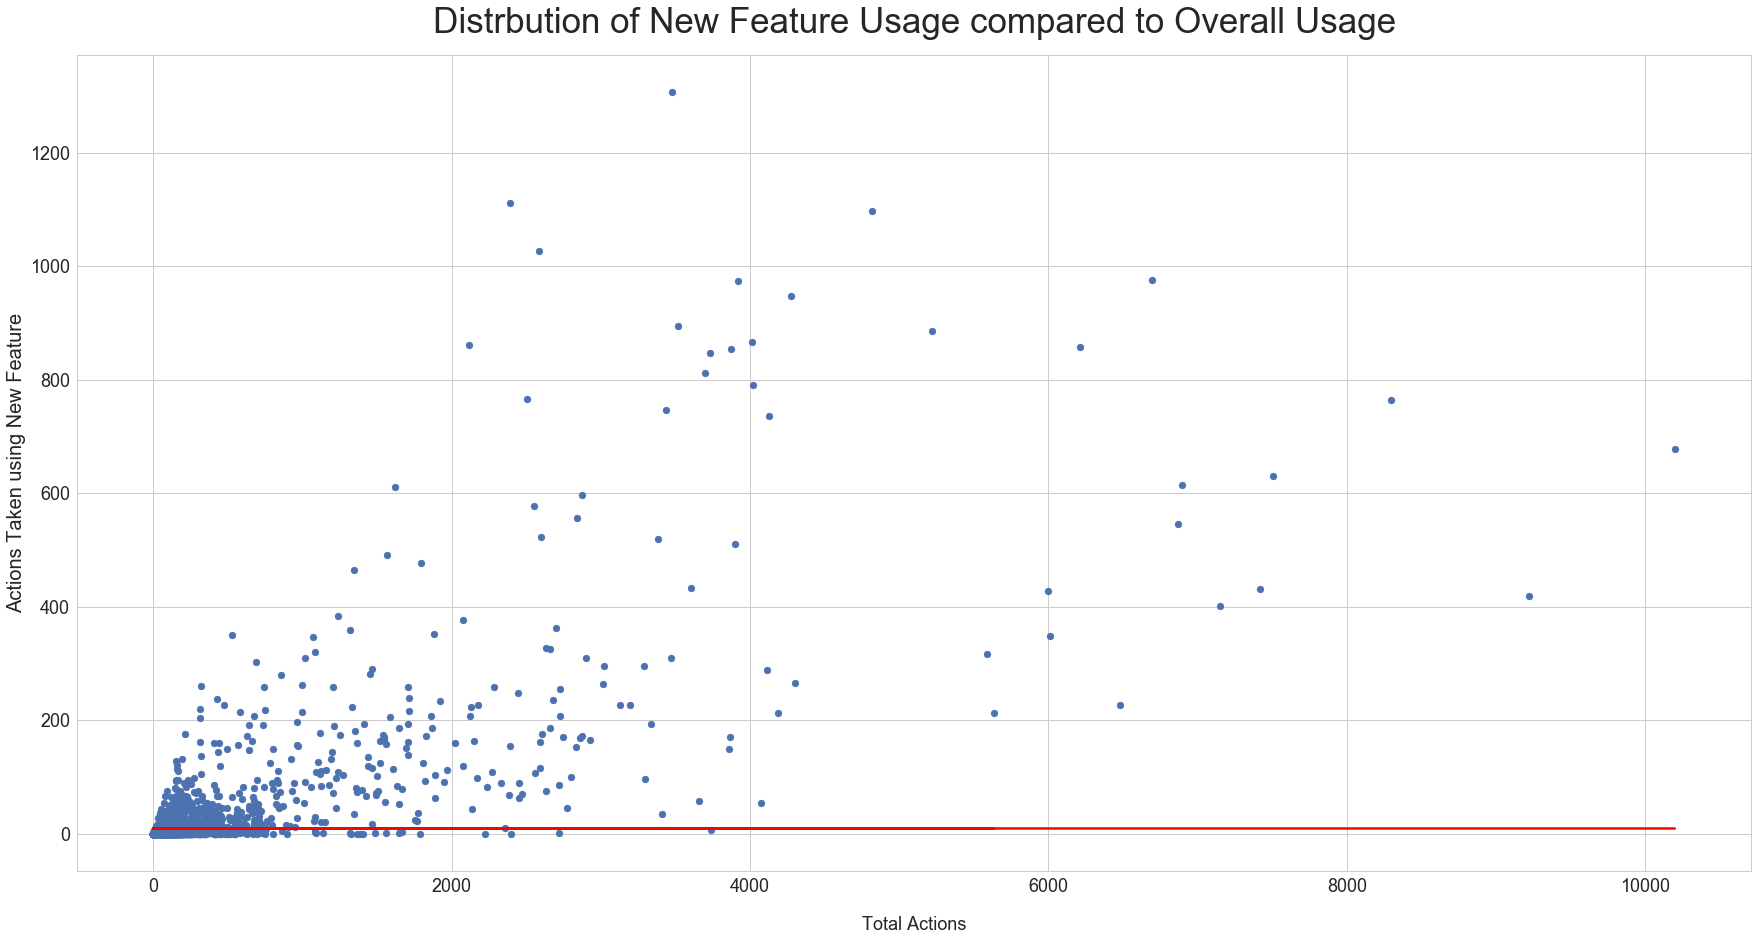

In [679]:
## Find Correlation between weekly usage of legacy applications and new applications

fig, ax = plt.subplots(figsize=(30,15))

x_axis = kpi_data_byclient_week['TotalUsage']
y_axis = kpi_data_byclient_week['NEWAPPEALACTIONS']+kpi_data_byclient_week['NEWCODINGACTIONS']

avg = sum(y_axis)/len(y_axis)
avg_number = []
for i in range(0,len(x_axis)):
    avg_number.append(avg)
#test_data = pd.DataFrame(columns=["x","y"])

#test_data.append(pd.Series([x_axis, y_axis], index=test_data.columns), ignore_index=True)
ax.scatter(x_axis, y_axis)
ax.plot(x_axis, avg_number, color="red")
plt.title('Distrbution of New Feature Usage compared to Overall Usage', fontsize = 35, y= 1.02)
plt.xlabel("Total Actions", fontsize = 18, labelpad = 20)
plt.ylabel("Actions Taken using New Feature", fontsize = 20)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"
fileName = "/Distribution.png"

plt.savefig(outputDir+fileName)

plt.show()

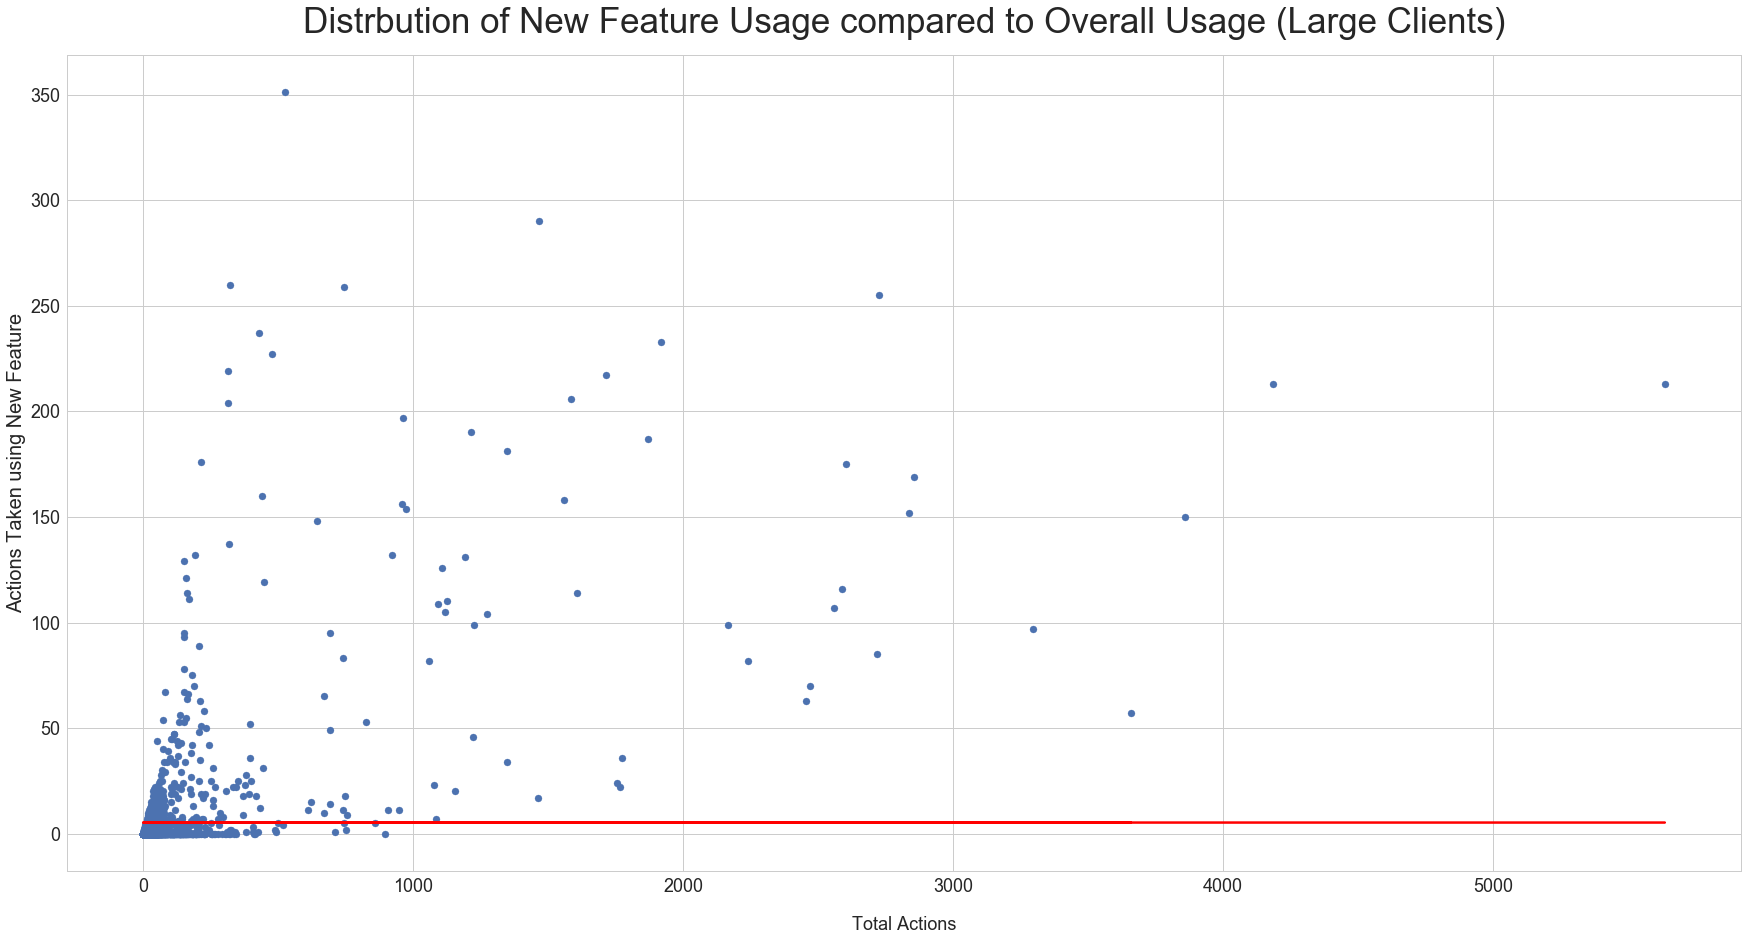

In [718]:
fig, ax = plt.subplots(figsize=(30,15))

x_axis_set = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Large",['TotalUsage']]

y_axis_set = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Large"
                                   ,['NEWAPPEALACTIONS']]
y_axis_set2 = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Large"
                                     ,['NEWCODINGACTIONS']]
x_axis = []
y_axis = []
for i in x_axis_set.index.values:
    x_axis.append(x_axis_set['TotalUsage'][i])
    y_axis.append(y_axis_set['NEWAPPEALACTIONS'][i]+y_axis_set2['NEWCODINGACTIONS'][i])
 

avg = sum(y_axis)/len(y_axis)
avg_number = []
for i in range(0,len(x_axis)):
    avg_number.append(avg)
#test_data = pd.DataFrame(columns=["x","y"])

#test_data.append(pd.Series([x_axis, y_axis], index=test_data.columns), ignore_index=True)
ax.scatter(x_axis, y_axis)
ax.plot(x_axis, avg_number, color="red")
plt.title('Distrbution of New Feature Usage compared to Overall Usage (Large Clients)', fontsize = 35, y= 1.02)
plt.xlabel("Total Actions", fontsize = 18, labelpad = 20)
plt.ylabel("Actions Taken using New Feature", fontsize = 20)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"
fileName = "/DistributionLarge.png"

plt.savefig(outputDir+fileName)

plt.show()


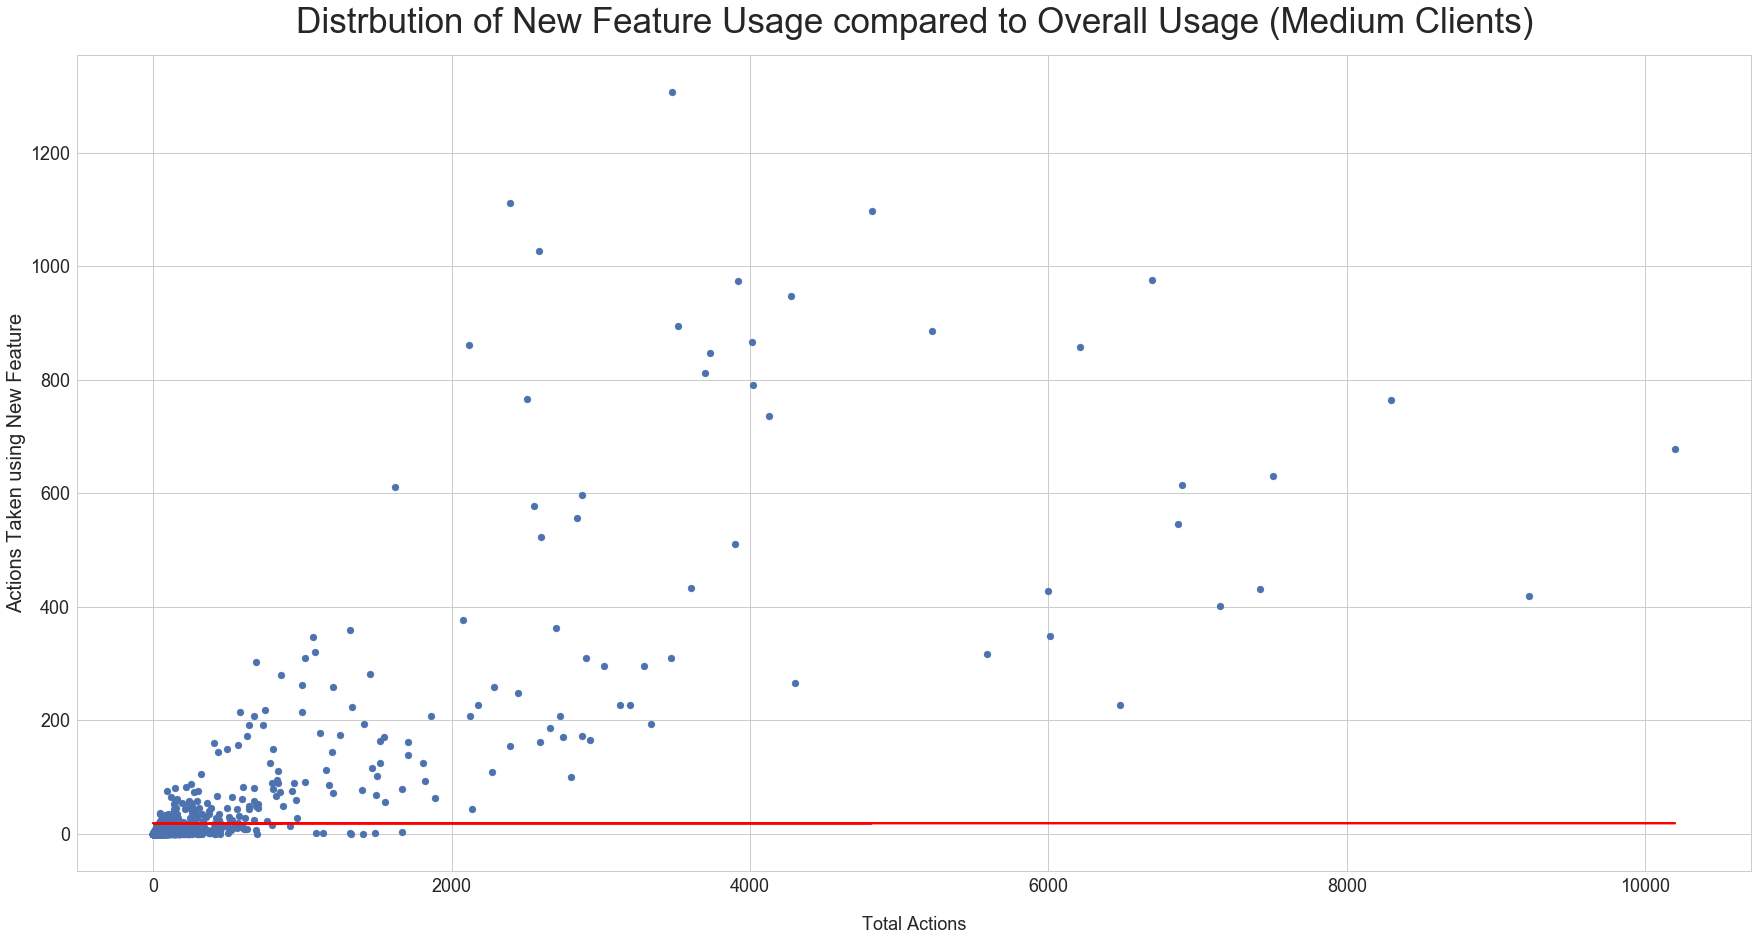

In [719]:
fig, ax = plt.subplots(figsize=(30,15))

x_axis_set = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Medium",['TotalUsage']]

y_axis_set = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Medium"
                                   ,['NEWAPPEALACTIONS']]
y_axis_set2 = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Medium"
                                     ,['NEWCODINGACTIONS']]
x_axis = []
y_axis = []
for i in x_axis_set.index.values:
    x_axis.append(x_axis_set['TotalUsage'][i])
    y_axis.append(y_axis_set['NEWAPPEALACTIONS'][i]+y_axis_set2['NEWCODINGACTIONS'][i])
 

avg = sum(y_axis)/len(y_axis)
avg_number = []
for i in range(0,len(x_axis)):
    avg_number.append(avg)
#test_data = pd.DataFrame(columns=["x","y"])

#test_data.append(pd.Series([x_axis, y_axis], index=test_data.columns), ignore_index=True)
ax.scatter(x_axis, y_axis)
ax.plot(x_axis, avg_number, color="red")
plt.title('Distrbution of New Feature Usage compared to Overall Usage (Medium Clients)', fontsize = 35, y= 1.02)
plt.xlabel("Total Actions", fontsize = 18, labelpad = 20)
plt.ylabel("Actions Taken using New Feature", fontsize = 20)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"
fileName = "/DistributionMedium.png"

plt.savefig(outputDir+fileName)

plt.show()

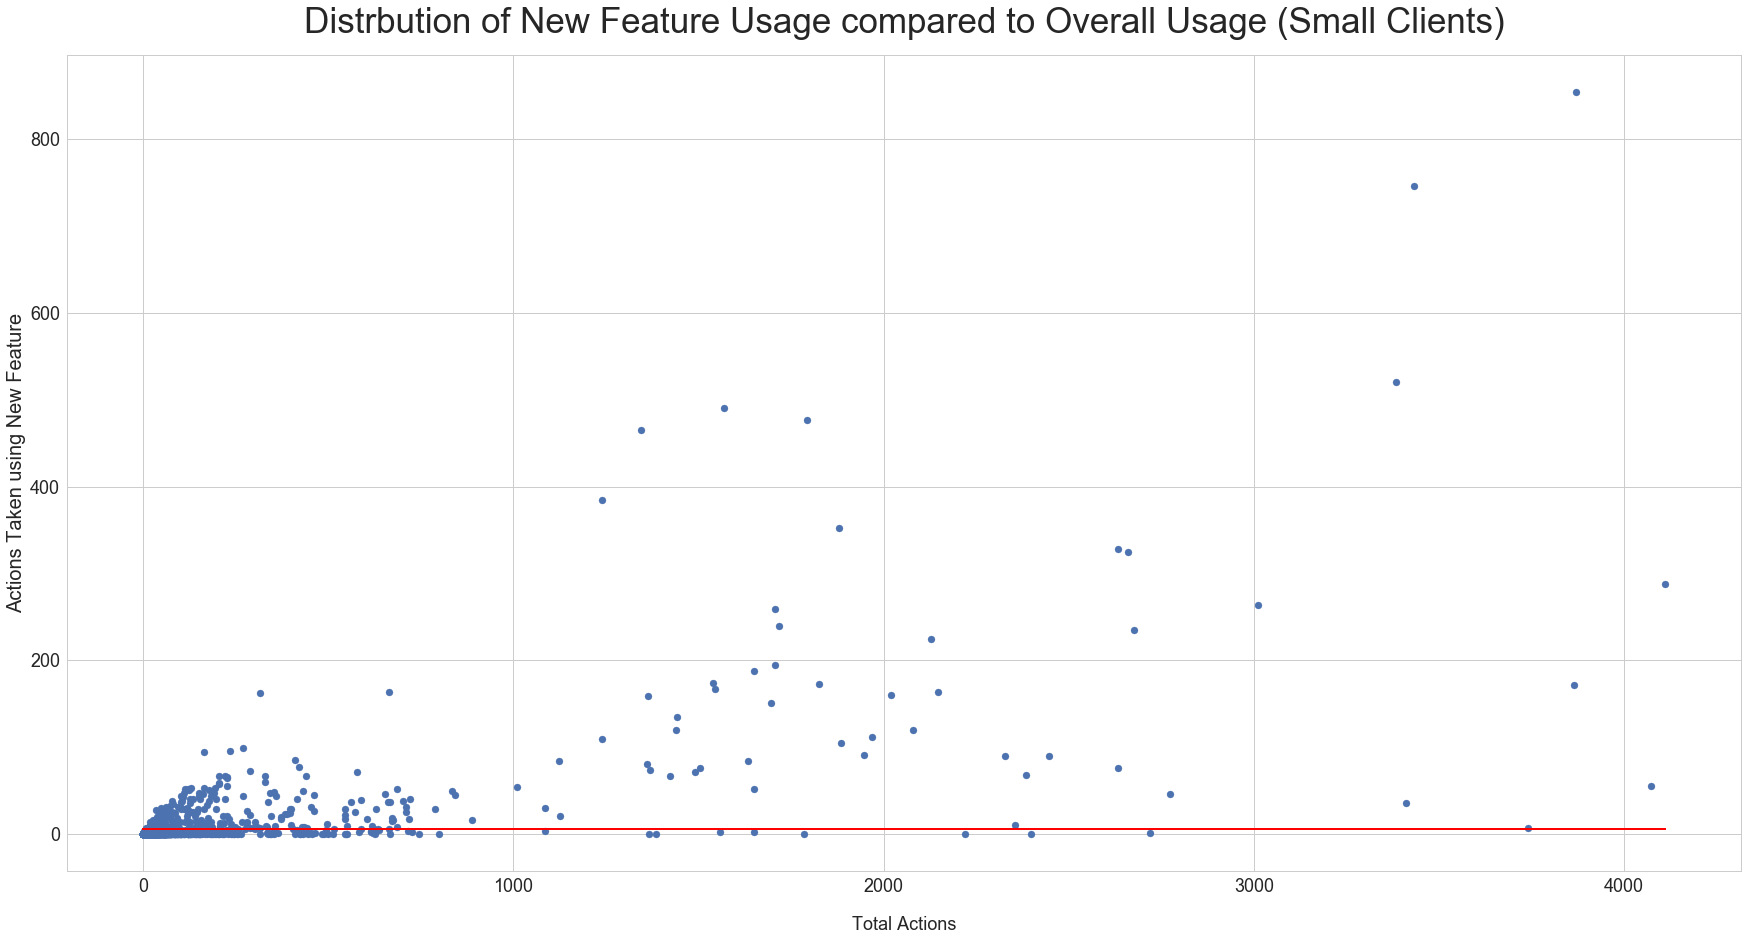

In [720]:
fig, ax = plt.subplots(figsize=(30,15))

x_axis_set = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Small",['TotalUsage']]

y_axis_set = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Small"
                                   ,['NEWAPPEALACTIONS']]
y_axis_set2 = kpi_data_byclient_week.loc[kpi_data_byclient_week['CLIENTSIZE']=="Small"
                                     ,['NEWCODINGACTIONS']]
x_axis = []
y_axis = []
for i in x_axis_set.index.values:
    x_axis.append(x_axis_set['TotalUsage'][i])
    y_axis.append(y_axis_set['NEWAPPEALACTIONS'][i]+y_axis_set2['NEWCODINGACTIONS'][i])
 

avg = sum(y_axis)/len(y_axis)
avg_number = []
for i in range(0,len(x_axis)):
    avg_number.append(avg)
#test_data = pd.DataFrame(columns=["x","y"])

#test_data.append(pd.Series([x_axis, y_axis], index=test_data.columns), ignore_index=True)
ax.scatter(x_axis, y_axis)
ax.plot(x_axis, avg_number, color="red")
plt.title('Distrbution of New Feature Usage compared to Overall Usage (Small Clients)', fontsize = 35, y= 1.02)
plt.xlabel("Total Actions", fontsize = 18, labelpad = 20)
plt.ylabel("Actions Taken using New Feature", fontsize = 20)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"
fileName = "/DistributionSmall.png"

plt.savefig(outputDir+fileName)

plt.show()

## Measure Retention Rate per week.

In [654]:
list_of_week = kpi_data_byclient_week['WEEK'].unique()
list_of_week.sort()

column_names = ["Week", "TotalUsersPreviousWeek", "ReturnUser"]
kpi_retention_rate_base = pd.DataFrame(columns = column_names)

for i in range(1,len(list_of_week)):
    client_list = (kpi_data_byclient_week.loc[(kpi_data_byclient_week['WEEK']==list_of_week[i-1])&(kpi_data_byclient_week['Used New Feature (Y/N)']=="Y")
                                                                                                   , 'CLIENTID'])
    current_week = (kpi_data_byclient_user.loc[((kpi_data_byclient_week['WEEK']==list_of_week[i])&(kpi_data_byclient_week['Used New Feature (Y/N)']=='Y'))|
                                               ((kpi_data_byclient_week['WEEK']==list_of_week[i])&(kpi_data_byclient_week['Didnt Use it at all']=='NoUse'))
                                               , 'CLIENTID'])
    total_user_prev_week = len(client_list)
    set_current_week = set(current_week)
    set_client_list = set(client_list)
    same_users = set_current_week.intersection(set_client_list)
    return_users = len(same_users)
    kpi_retention_rate_base = kpi_retention_rate_base.append(pd.Series([list_of_week[i],total_user_prev_week,return_users], index = kpi_retention_rate_base.columns), ignore_index= True)

        
kpi_retention_rate_base = kpi_retention_rate_base.sort_values(by='Week')

kpi_retention_rate_base['RetentionRate'] = (kpi_retention_rate_base['ReturnUser']/kpi_retention_rate_base['TotalUsersPreviousWeek'])*100

kpi_retention_rate_base.head(15)

,Week,TotalUsersPreviousWeek,ReturnUser,RetentionRate
0,2017-11-20,181,130,71.8232
1,2017-11-27,309,209,67.6375
2,2017-12-04,366,237,64.7541
3,2017-12-11,364,246,67.5824
4,2017-12-18,359,253,70.4735
5,2017-12-25,352,227,64.4886
6,2018-01-01,331,223,67.3716
7,2018-01-08,356,252,70.7865


In [546]:
## Retention Rates by Size of the Client 

list_of_week_size = kpi_data_byclient_user['WEEK'].unique()
list_of_week_size.sort()


column_names_size = ["Week", "ClientSize", "TotalUsersPreviousWeek", "ReturnUser"]
kpi_retention_rate_size = pd.DataFrame(columns = column_names_size)

for i in range(1,len(list_of_week_size)):
    client_list_small = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_size[i-1])&(kpi_data_byclient_user['CLIENTSIZE']=='Small')
                                              , 'CLIENTID'])
    client_list_medium = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_size[i-1])&(kpi_data_byclient_user['CLIENTSIZE']=='Medium')
                                              , 'CLIENTID'])
    client_list_large = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_size[i-1])&(kpi_data_byclient_user['CLIENTSIZE']=='Large')
                                              , 'CLIENTID'])
    
    current_week_small = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_size[i])&(kpi_data_byclient_user['CLIENTSIZE']=='Small')
                                               , 'CLIENTID'])
    current_week_medium = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_size[i])&(kpi_data_byclient_user['CLIENTSIZE']=='Medium')
                                               , 'CLIENTID'])
    current_week_large = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_size[i])&(kpi_data_byclient_user['CLIENTSIZE']=='Large')
                                               , 'CLIENTID'])
    
    client_size_small = "Small"
    client_size_medium = "Medium"
    
    
    total_user_prev_week_small = len(client_list_small)
    total_user_prev_week_medium = len(client_list_medium)
    total_user_prev_week_large = len(client_list_large)
    
    set_current_week_small = set(current_week_small)
    set_current_week_medium = set(current_week_medium)
    set_current_week_large = set(current_week_large)
    
    set_client_list_small = set(client_list_small)
    set_client_list_medium = set(client_list_medium)
    set_client_list_large = set(client_list_large)
    
    same_users_small = set_current_week_small.intersection(set_client_list_small)
    same_users_medium = set_current_week_medium.intersection(set_client_list_medium)
    same_users_large = set_current_week_large.intersection(set_client_list_large)
    
    return_users_small = len(same_users_small)
    return_users_medium = len(same_users_medium)
    return_users_large = len(same_users_large)
    
    kpi_retention_rate_size = kpi_retention_rate_size.append(pd.Series([list_of_week_size[i], 'Small' , total_user_prev_week_small,return_users_small], index = kpi_retention_rate_size.columns), ignore_index= True)
    
    kpi_retention_rate_size = kpi_retention_rate_size.append(pd.Series([list_of_week_size[i], 'Medium', total_user_prev_week_medium,return_users_medium], index = kpi_retention_rate_size.columns), ignore_index= True)
    
    kpi_retention_rate_size = kpi_retention_rate_size.append(pd.Series([list_of_week_size[i],'Large', total_user_prev_week_large,return_users_large], index = kpi_retention_rate_size.columns), ignore_index= True)
    

        
kpi_retention_rate_size = kpi_retention_rate_size.sort_values(by='Week')

kpi_retention_rate_size['RetentionRate'] = (kpi_retention_rate_size['ReturnUser']/kpi_retention_rate_size['TotalUsersPreviousWeek'])*100

kpi_retention_rate_size.head(15)

,Week,ClientSize,TotalUsersPreviousWeek,ReturnUser,RetentionRate
0,2017-11-20,Small,50,34,68
1,2017-11-20,Medium,81,66,81.4815
2,2017-11-20,Large,50,30,60
3,2017-11-27,Small,103,63,61.165
4,2017-11-27,Medium,114,85,74.5614
5,2017-11-27,Large,92,61,66.3043
6,2017-12-04,Small,123,77,62.6016
7,2017-12-04,Medium,135,93,68.8889
8,2017-12-04,Large,108,67,62.037
10,2017-12-11,Medium,131,95,72.5191


In [621]:
## Retention Rates by Speciality of the Client 

list_of_week_specialty = kpi_data_byclient_user['WEEK'].unique()
list_of_week_specialty.sort()


column_names_size = ["Week", "ClientSpecialty", "TotalUsersPreviousWeek", "ReturnUser"]
kpi_retention_rate_specialty = pd.DataFrame(columns = column_names_size)

for i in range(1,len(list_of_week_size)):
    client_list_obgyn = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i-1])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='OB-GYN')
                                              , 'CLIENTID'])
    client_list_surgery = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i-1])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Surgery')
                                              , 'CLIENTID'])
    client_list_pediatrics = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i-1])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Pediatrics')
                                              , 'CLIENTID'])
    client_list_familymed = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i-1])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Family Medicine')
                                              , 'CLIENTID'])
    client_list_dermatology = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i-1])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Dermatology')
                                              , 'CLIENTID'])
    client_list_oncology = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i-1])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Oncology')
                                              , 'CLIENTID'])
    
    current_week_obgyn = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='OB-GYN')
                                               , 'CLIENTID'])
    current_week_surgery = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Surgery')
                                               , 'CLIENTID'])
    current_week_pediatrics = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Pediatrics')
                                               , 'CLIENTID'])
    current_week_familymed = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Family Medicine')
                                               , 'CLIENTID'])
    current_week_dermatology = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Dermatology')
                                               , 'CLIENTID'])
    current_week_oncology = (kpi_data_byclient_user.loc[(kpi_data_byclient_user['WEEK']==list_of_week_specialty[i])&(kpi_data_byclient_user['CLIENTSPECIALTY']=='Oncology')
                                               , 'CLIENTID'])
    
    total_user_prev_week_obgyn = len(client_list_obgyn)
    total_user_prev_week_surgery = len(client_list_surgery)
    total_user_prev_week_pediatrics = len(client_list_pediatrics)
    total_user_prev_week_familymed = len(client_list_familymed)
    total_user_prev_week_dermatology = len(client_list_dermatology)
    total_user_prev_week_oncology = len(client_list_oncology)
    
    set_current_week_obgyn = set(current_week_obgyn)
    set_current_week_surgery = set(current_week_surgery)
    set_current_week_pediatrics = set(current_week_pediatrics)
    set_current_week_familymed = set(current_week_familymed)
    set_current_week_dermatology = set(current_week_dermatology)
    set_current_week_oncology = set(current_week_oncology)
    
    set_client_list_obgyn = set(client_list_obgyn)
    set_client_list_surgery = set(client_list_surgery)
    set_client_list_pediatrics = set(client_list_pediatrics)
    set_client_list_familymed = set(client_list_familymed)
    set_client_list_dermatology = set(client_list_dermatology)
    set_client_list_oncology = set(client_list_oncology)
    
    same_users_obgyn = set_current_week_obgyn.intersection(set_client_list_obgyn)
    same_users_surgery = set_current_week_surgery.intersection(set_client_list_surgery)
    same_users_pediatrics = set_current_week_pediatrics.intersection(set_client_list_pediatrics)
    same_users_familymed = set_current_week_familymed.intersection(set_client_list_familymed)
    same_users_dermatology = set_current_week_dermatology.intersection(set_client_list_dermatology)
    same_users_oncology = set_current_week_oncology.intersection(set_client_list_oncology)
    
    return_users_obgyn = len(same_users_obgyn)
    return_users_surgery = len(same_users_surgery)
    return_users_pediatrics = len(same_users_pediatrics)
    return_users_familymed = len(same_users_familymed)
    return_users_dermatology = len(same_users_dermatology)
    return_users_oncology = len(same_users_oncology)
    
    kpi_retention_rate_specialty = kpi_retention_rate_specialty.append(pd.Series([list_of_week_specialty[i], 'OB-GYN' , total_user_prev_week_obgyn,return_users_obgyn], index = kpi_retention_rate_specialty.columns), ignore_index= True)
    
    kpi_retention_rate_specialty = kpi_retention_rate_specialty.append(pd.Series([list_of_week_specialty[i], 'Surgery', total_user_prev_week_surgery,return_users_surgery], index = kpi_retention_rate_specialty.columns), ignore_index= True)
    
    kpi_retention_rate_specialty = kpi_retention_rate_specialty.append(pd.Series([list_of_week_specialty[i],'Pediatrics', total_user_prev_week_pediatrics, return_users_pediatrics], index = kpi_retention_rate_specialty.columns), ignore_index= True)
    
    kpi_retention_rate_specialty = kpi_retention_rate_specialty.append(pd.Series([list_of_week_specialty[i], 'Family Medicine' , total_user_prev_week_familymed,return_users_familymed], index = kpi_retention_rate_specialty.columns), ignore_index= True)
    
    kpi_retention_rate_specialty = kpi_retention_rate_specialty.append(pd.Series([list_of_week_specialty[i], 'Dermatology', total_user_prev_week_dermatology,return_users_dermatology], index = kpi_retention_rate_specialty.columns), ignore_index= True)
    
    kpi_retention_rate_specialty = kpi_retention_rate_specialty.append(pd.Series([list_of_week_specialty[i],'Oncology', total_user_prev_week_oncology,return_users_oncology], index = kpi_retention_rate_specialty.columns), ignore_index= True)
    

        
kpi_retention_rate_specialty = kpi_retention_rate_specialty.sort_values(by='Week')

kpi_retention_rate_specialty['RetentionRate'] = (kpi_retention_rate_specialty['ReturnUser']/kpi_retention_rate_specialty['TotalUsersPreviousWeek'])*100

kpi_retention_rate_specialty.head(15)

,Week,ClientSpecialty,TotalUsersPreviousWeek,ReturnUser,RetentionRate
0,2017-11-20,OB-GYN,24,20,83.3333
1,2017-11-20,Surgery,48,34,70.8333
2,2017-11-20,Pediatrics,41,35,85.3659
3,2017-11-20,Family Medicine,15,9,60
4,2017-11-20,Dermatology,24,15,62.5
5,2017-11-20,Oncology,29,17,58.6207
11,2017-11-27,Oncology,55,34,61.8182
10,2017-11-27,Dermatology,42,30,71.4286
9,2017-11-27,Family Medicine,36,18,50
7,2017-11-27,Surgery,84,57,67.8571


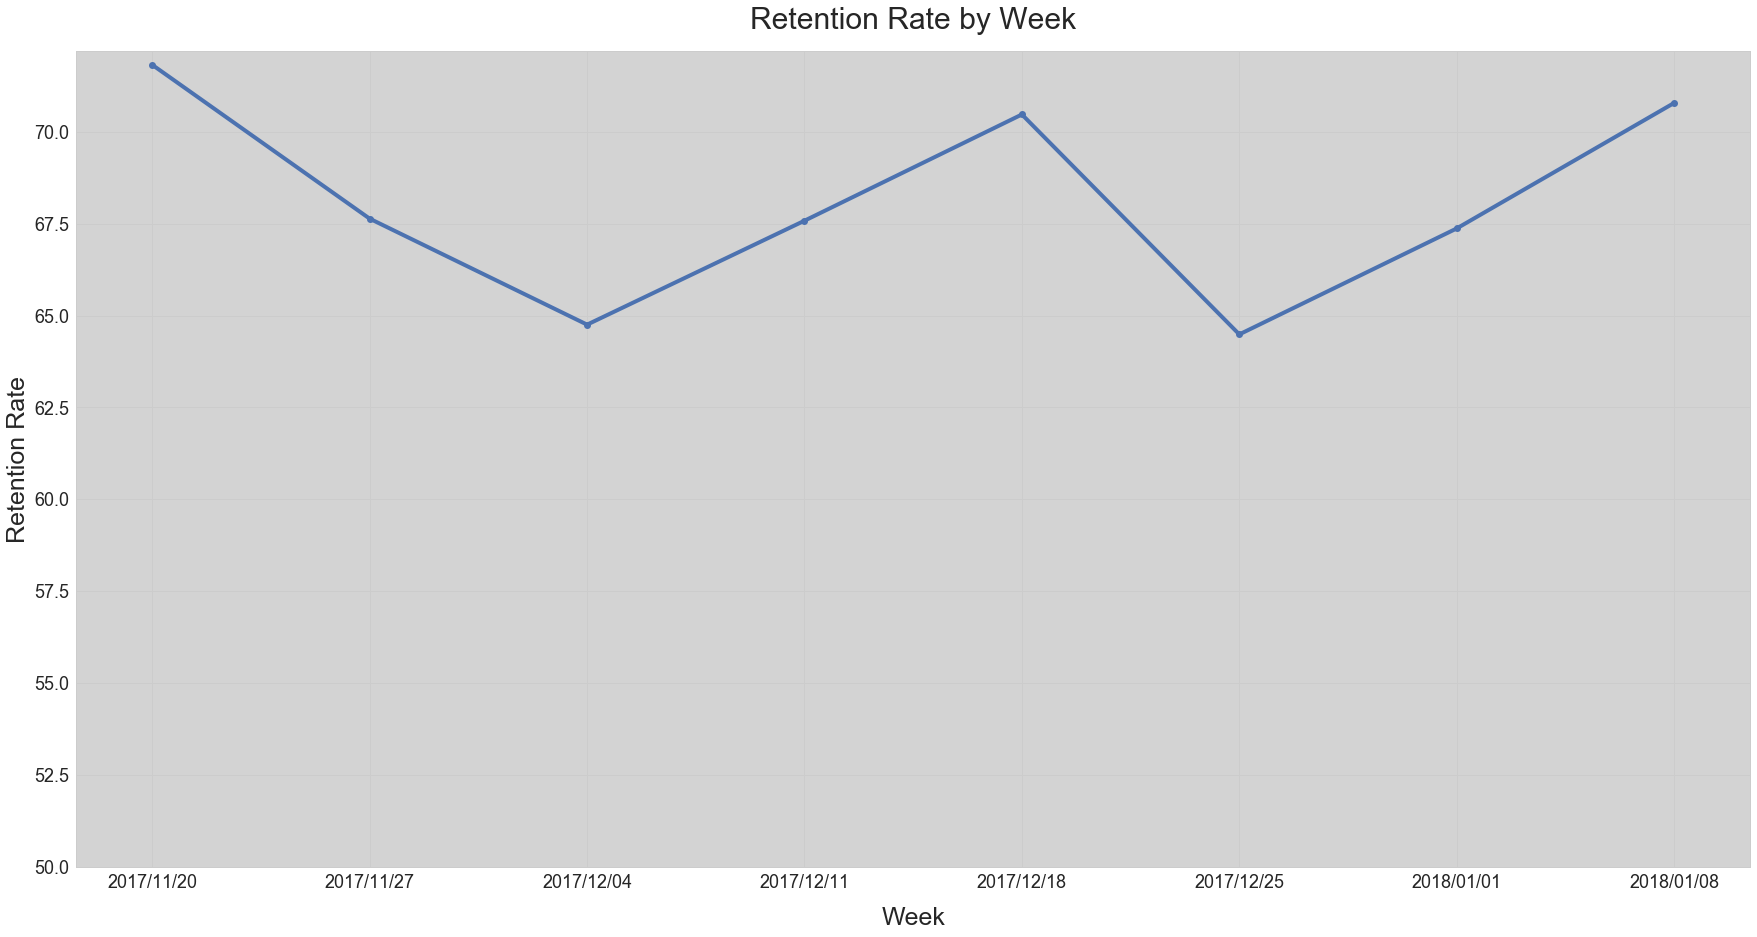

In [734]:
## plotting the three graphs 

fig, ax1 = plt.subplots(1,1,figsize=(30,15))

kpi_retention_rate_spec_graph = kpi_retention_rate_specialty.copy()
kpi_retention_rate_size_graph = kpi_retention_rate_size.copy()
kpi_retention_rate_base_graph = kpi_retention_rate_base.copy()


kpi_retention_rate_spec_graph.drop(["TotalUsersPreviousWeek", "ReturnUser"],axis = 1, inplace = True)
kpi_retention_rate_size_graph.drop(["TotalUsersPreviousWeek", "ReturnUser"],axis = 1, inplace = True)
kpi_retention_rate_base_graph.drop(["TotalUsersPreviousWeek", "ReturnUser"],axis = 1, inplace = True)

# pivot the size or specialty column 
kpi_retention_rate_spec_pivot = kpi_retention_rate_spec_graph.pivot(columns = "ClientSpecialty", index = "Week", values = "RetentionRate")
kpi_retention_rate_size_pivot = kpi_retention_rate_size_graph.pivot(columns = "ClientSize", index="Week", values = "RetentionRate")

## plot the three graphs 
r_base = []
for i in range(0,len(kpi_retention_rate_base_graph['Week'])):
    r_base.append(i)

list_of_week = [pd.to_datetime(i).strftime("%Y/%m/%d") for i in kpi_retention_rate_base_graph['Week']]
ax1.set_facecolor("lightgray")
ax1.plot(r_base, kpi_retention_rate_base_graph['RetentionRate'], marker ='o', linewidth = 4)
plt.title('Retention Rate by Week', fontsize = 30, y= 1.02)
plt.xticks(r_base, list_of_week)
plt.xlabel("Week", fontsize = 25, labelpad = 15)
plt.ylabel("Retention Rate", fontsize = 25)
plt.ylim(bottom=50)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

Image_fileName = r"\OverallRetentionRate.png"
Data_fileName = r"\OverallRetentionRate.xlsx"
#Save Graph
plt.savefig(outputDir+Image_fileName)
kpi_retention_rate_base.to_excel(outputDir+Data_fileName, index = False)
plt.show()

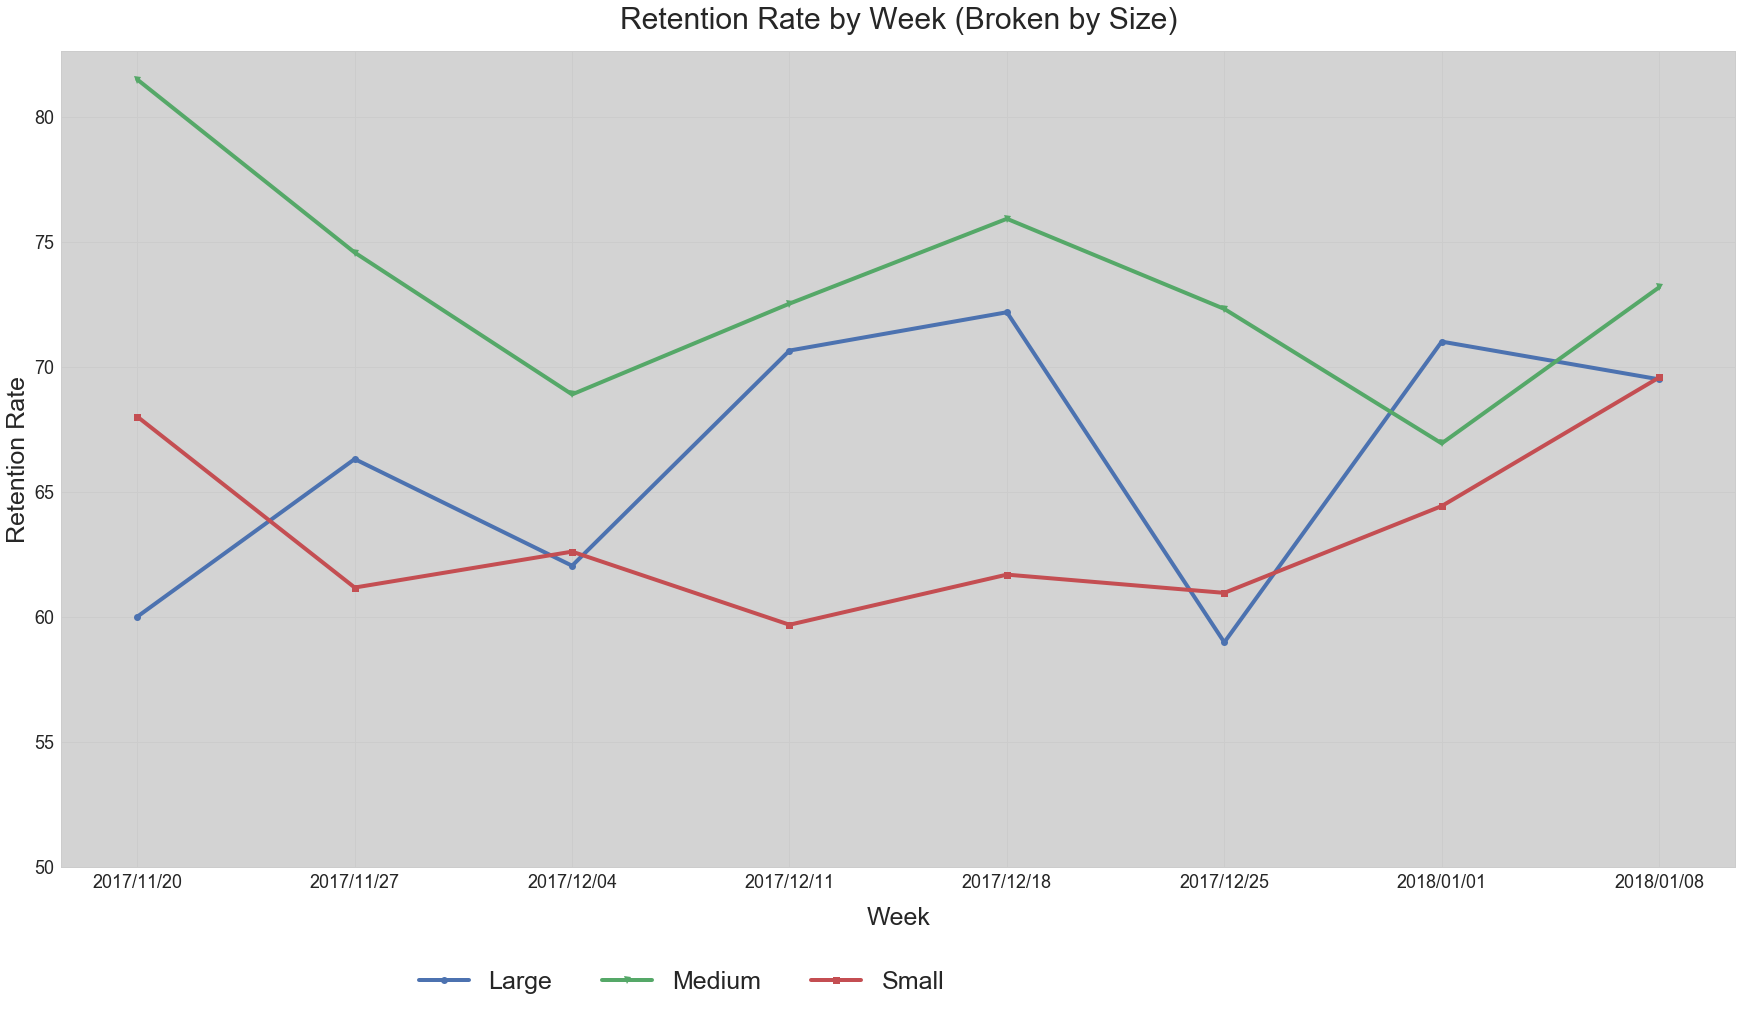

In [735]:
## plot the three graphs 
fig, ax = plt.subplots(figsize=(30,15))

r_base = []
for i in range(0,len(kpi_retention_rate_size_pivot.index.values)):
    r_base.append(i)

list_of_week = [pd.to_datetime(i).strftime("%Y/%m/%d") for i in kpi_retention_rate_size_pivot.index.values]
ax.set_facecolor("lightgray")
ax.plot(r_base, kpi_retention_rate_size_pivot['Large'], marker ='o', label = "Large", linewidth = 4)
ax.plot(r_base, kpi_retention_rate_size_pivot['Medium'], marker='v', label = "Medium", linewidth = 4)
ax.plot(r_base, kpi_retention_rate_size_pivot['Small'], marker = 's', label = "Small", linewidth = 4)

legend = ax.legend(loc="upper left", fontsize = 25, bbox_to_anchor=(0.2,-0.1), ncol=3)
plt.title('Retention Rate by Week (Broken by Size)', fontsize = 30, y= 1.02)
plt.xticks(r_base, list_of_week)
plt.xlabel("Week", fontsize = 25, labelpad = 15)
plt.ylabel("Retention Rate", fontsize = 25)
plt.ylim(bottom=50)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

Image_fileName = r"\RetentionRateBySize.png"
Data_fileName = r"\RetentionRateBySize.xlsx"
#Save Graph
plt.savefig(outputDir+Image_fileName)
kpi_retention_rate_size_pivot.to_excel(outputDir+Data_fileName, index = False)
plt.show()

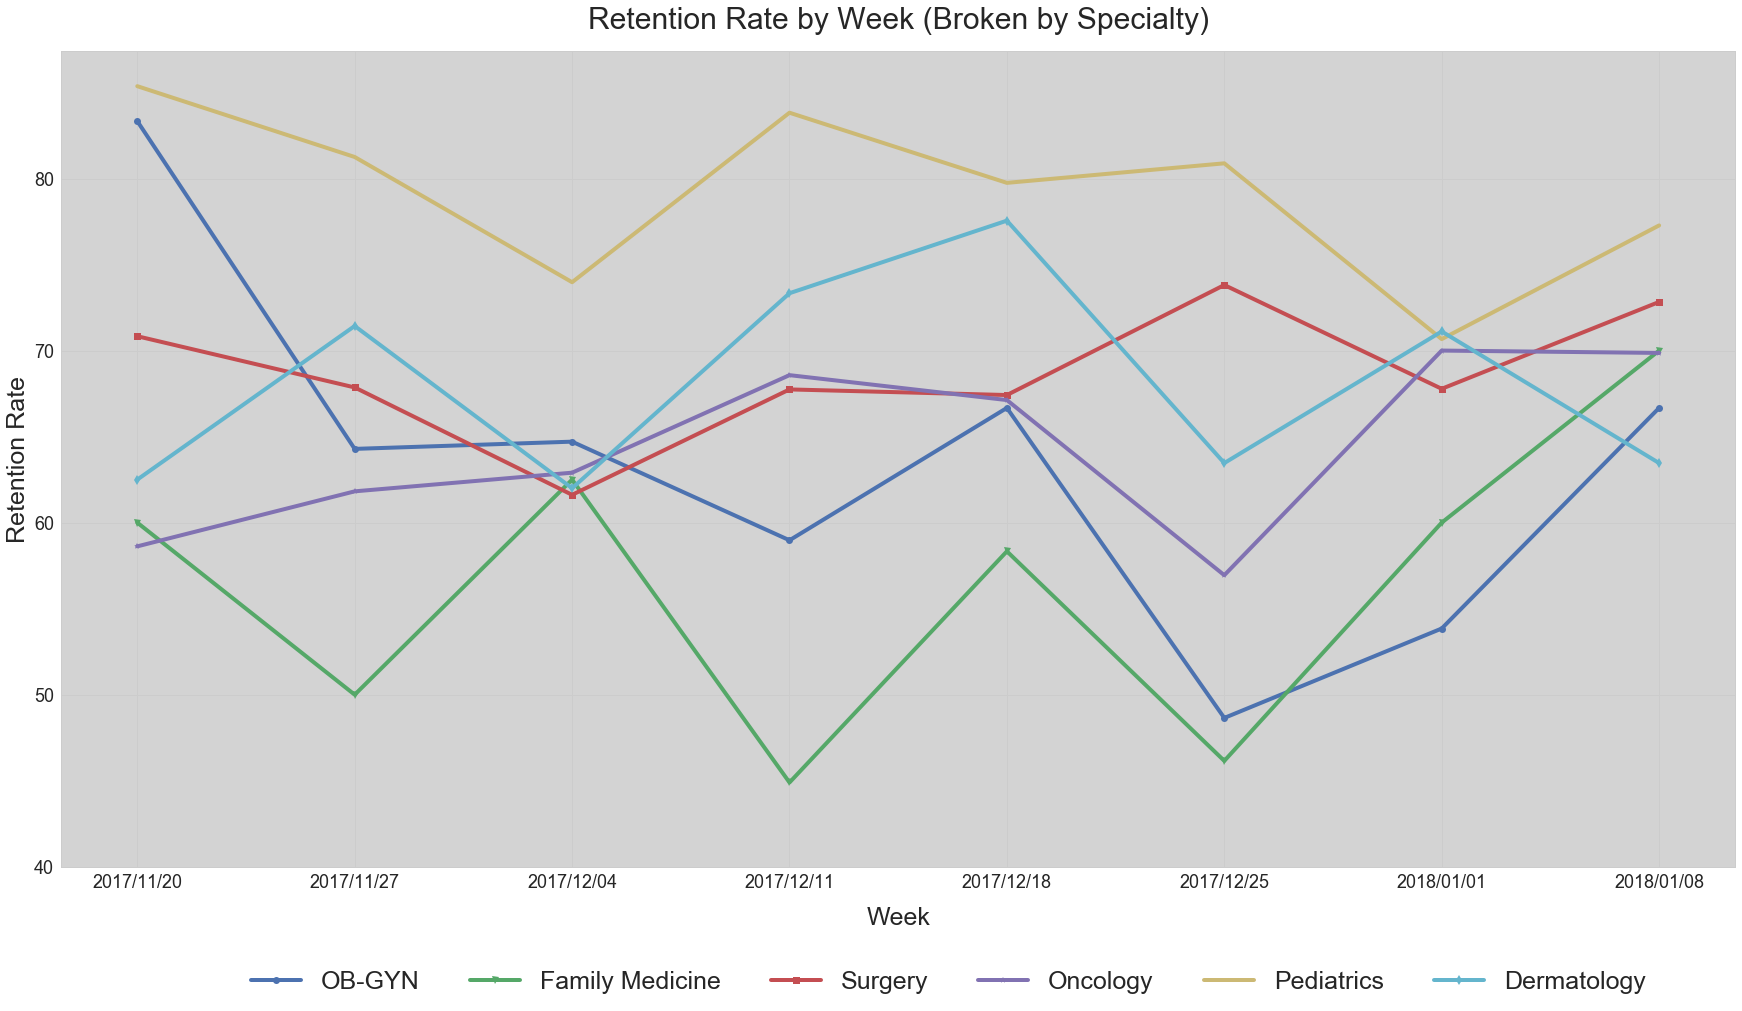

In [736]:
## plot the three graphs 
fig, ax = plt.subplots(figsize=(30,15))

r_base = []
for i in range(0,len(kpi_retention_rate_spec_pivot.index.values)):
    r_base.append(i)

list_of_week = [pd.to_datetime(i).strftime("%Y/%m/%d") for i in kpi_retention_rate_spec_pivot.index.values]
ax.set_facecolor("lightgray")
ax.plot(r_base, kpi_retention_rate_spec_pivot['OB-GYN'], marker ='o', label = "OB-GYN", linewidth = 4)
ax.plot(r_base, kpi_retention_rate_spec_pivot['Family Medicine'], marker='v', label = "Family Medicine", linewidth = 4)
ax.plot(r_base, kpi_retention_rate_spec_pivot['Surgery'], marker = 's', label = "Surgery", linewidth = 4)
ax.plot(r_base, kpi_retention_rate_spec_pivot['Oncology'], marker = '*', label = "Oncology",linewidth = 4)
ax.plot(r_base, kpi_retention_rate_spec_pivot['Pediatrics'], marker = 'x', label = "Pediatrics", linewidth = 4)
ax.plot(r_base, kpi_retention_rate_spec_pivot['Dermatology'], marker = 'd', label = "Dermatology", linewidth = 4)

legend = ax.legend(loc="upper left", fontsize = 25, bbox_to_anchor=(0.1,-0.1), ncol=6)
plt.title('Retention Rate by Week (Broken by Specialty)', fontsize = 30, y= 1.02)
plt.xticks(r_base, list_of_week)
plt.xlabel("Week", fontsize = 25, labelpad = 15)
plt.ylabel("Retention Rate", fontsize = 25)
plt.ylim(bottom=40)
plt.tick_params(labelsize = 18)

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

Image_fileName = r"\RetentionRateBySpecialty.png"
Data_fileName = r"\RetentionRateBySpecialty.xlsx"
#Save Graph
plt.savefig(outputDir+Image_fileName)
kpi_retention_rate_spec_pivot.to_excel(outputDir+Data_fileName, index = False)
plt.show()

## Finding trends in people who never used the new feature even once 

In [634]:
## Cleints who never used it once 

clients_no_new_feature = kpi_data_byclient_week.copy()

clients_no_new_feature['TotalUsage'] = clients_no_new_feature['NEWAPPEALACTIONS']+clients_no_new_feature['NEWCODINGACTIONS']

##grouping by clients to find clients who never used new feature

clients_no_new_feature_grouped = clients_no_new_feature.groupby(['CLIENTID', 'CLIENTSIZE','CLIENTSPECIALTY'], as_index=False)['TotalUsage'].sum()

client_no_new_feature_used = clients_no_new_feature_grouped.loc[clients_no_new_feature_grouped['TotalUsage']==0,:]


,CLIENTID,CLIENTSIZE,CLIENTSPECIALTY,TotalUsage
5,75,Small,Surgery,0
13,147,Large,Dermatology,0
14,161,Small,Family Medicine,0
15,162,Large,Oncology,0
26,237,Large,Oncology,0


In [644]:
## Counting number of users for size and specialty

client_no_new_feature_used_both = client_no_new_feature_used.groupby(['CLIENTSIZE','CLIENTSPECIALTY'], as_index=False)['CLIENTID'].count()

client_no_new_feature_used_both.head(20)

,CLIENTSIZE,CLIENTSPECIALTY,CLIENTID
0,Large,Dermatology,34
1,Large,Oncology,109
2,Medium,Dermatology,11
3,Medium,OB-GYN,53
4,Medium,Pediatrics,31
5,Medium,Surgery,17
6,Small,Family Medicine,81
7,Small,Surgery,103


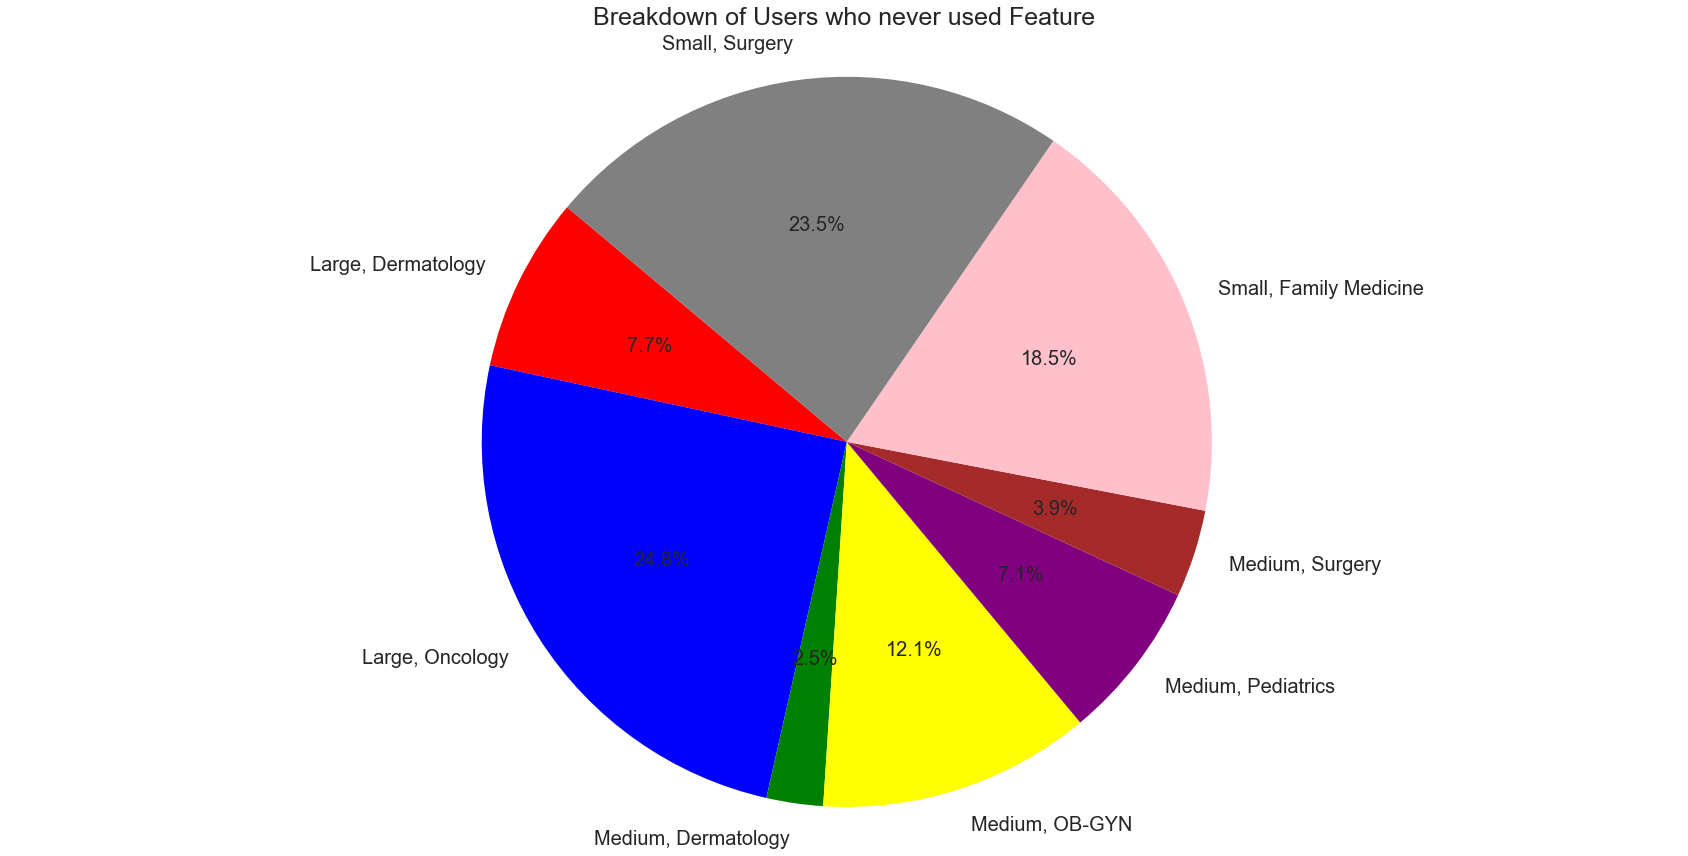

In [648]:
## plotting pie charts to see the make up by size and specialty

fig, ax = plt.subplots(figsize=(30,15))

client_no_new_feature_used_both['SizeSpecialty'] = client_no_new_feature_used_both['CLIENTSIZE'] + ", " + client_no_new_feature_used_both['CLIENTSPECIALTY']
size = []
for i in client_no_new_feature_used_both['CLIENTID']:
    size.append(i)
    
labels = []
for i in client_no_new_feature_used_both['SizeSpecialty']:
    labels.append(i)

colors = ['red','blue','green','yellow','purple','brown','pink','gray']    

wedges, texts, autotext = ax.pie(size, labels= labels,autopct='%1.1f%%', startangle=140, colors= colors)

plt.title('Breakdown of Users who never used Feature', fontsize = 25)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
texts[3].set_fontsize(20)
texts[4].set_fontsize(20)
texts[5].set_fontsize(20)
texts[6].set_fontsize(20)
texts[7].set_fontsize(20)

autotext[0].set_fontsize(20)
autotext[1].set_fontsize(20)
autotext[2].set_fontsize(20)
autotext[3].set_fontsize(20)
autotext[4].set_fontsize(20)
autotext[5].set_fontsize(20)
autotext[6].set_fontsize(20)
autotext[7].set_fontsize(20)

plt.axis("equal")

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

Image_fileName = r"\BreakdownofNonUsers.png"
Data_fileName = r"\BreakdownofNonUsers.xlsx"
#Save Graph
plt.savefig(outputDir+Image_fileName)
client_no_new_feature_used_both.to_excel(outputDir+Data_fileName, index = False)
plt.show()

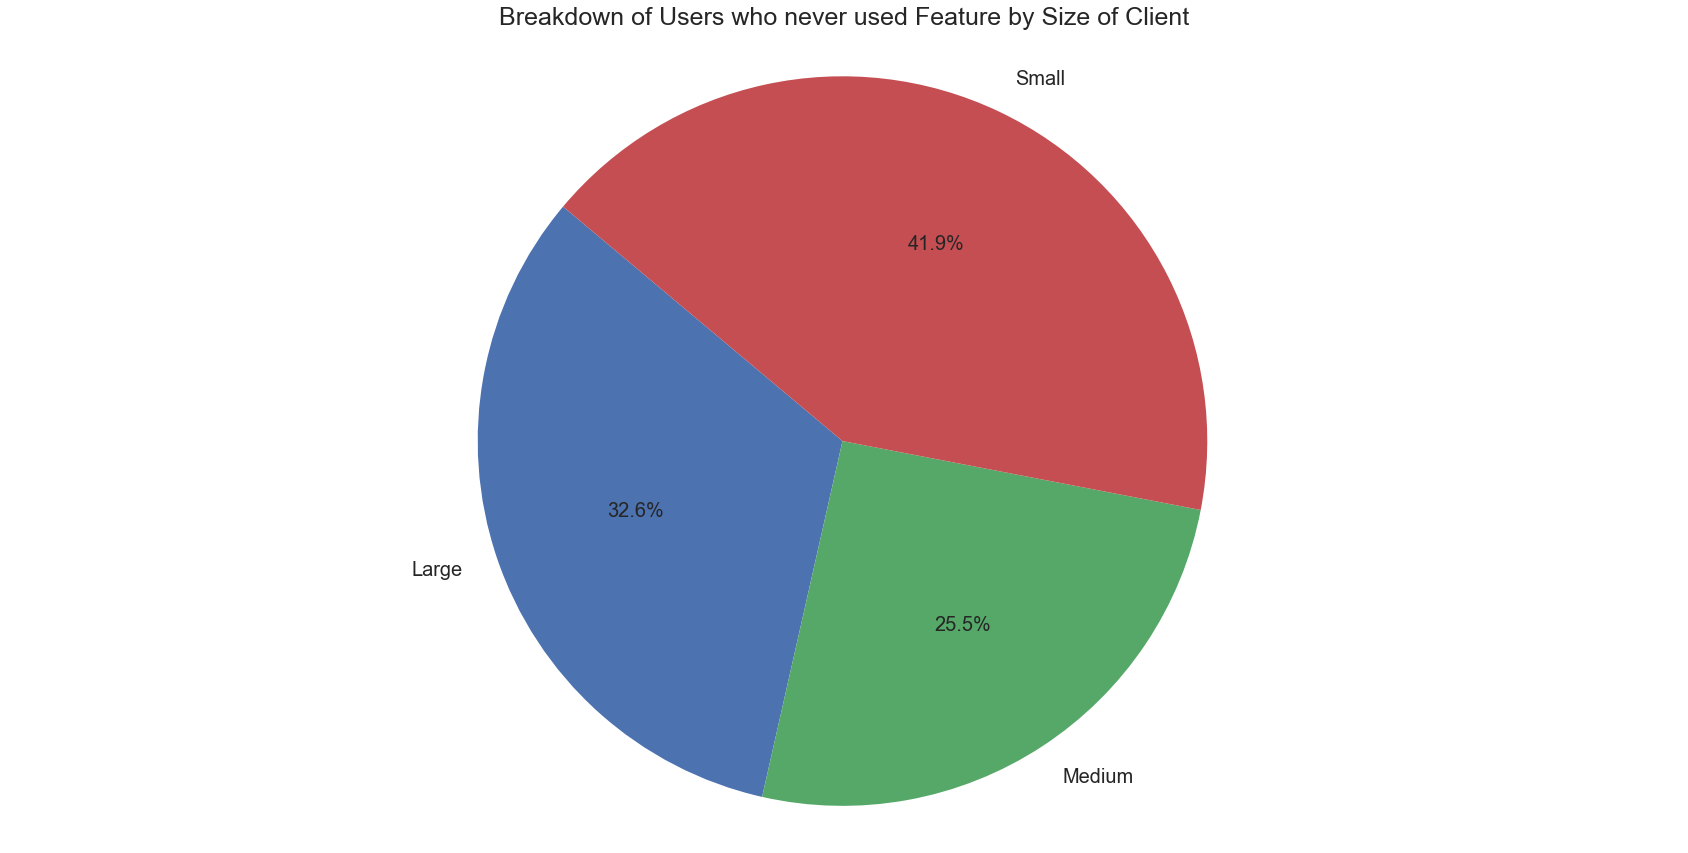

In [649]:
## plotting pie charts to see the make up by size and specialty

fig, ax = plt.subplots(figsize=(30,15))

client_bysize_no_new_feature_used = client_no_new_feature_used.groupby(['CLIENTSIZE'], as_index=False)['CLIENTID'].count()

size = []
for i in client_bysize_no_new_feature_used['CLIENTID']:
    size.append(i)
    
labels = []
for i in client_bysize_no_new_feature_used['CLIENTSIZE']:
    labels.append(i)

wedges, texts, autotext = ax.pie(size, labels= labels,autopct='%1.1f%%', startangle=140)

plt.title('Breakdown of Users who never used Feature by Size of Client', fontsize = 25)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)

autotext[0].set_fontsize(20)
autotext[1].set_fontsize(20)
autotext[2].set_fontsize(20)


plt.axis("equal")

outputDir = r"C:\Users\Ashtest\Desktop\AthenaProductAnalytics\OutputFIle"

Image_fileName = r"\BrekadownNonUsersSize.png"
Data_fileName = r"\BreakdownNonUsersSize.xlsx"
#Save Graph
plt.savefig(outputDir+Image_fileName)
client_bysize_no_new_feature_used.to_excel(outputDir+Data_fileName, index = False)
plt.show()

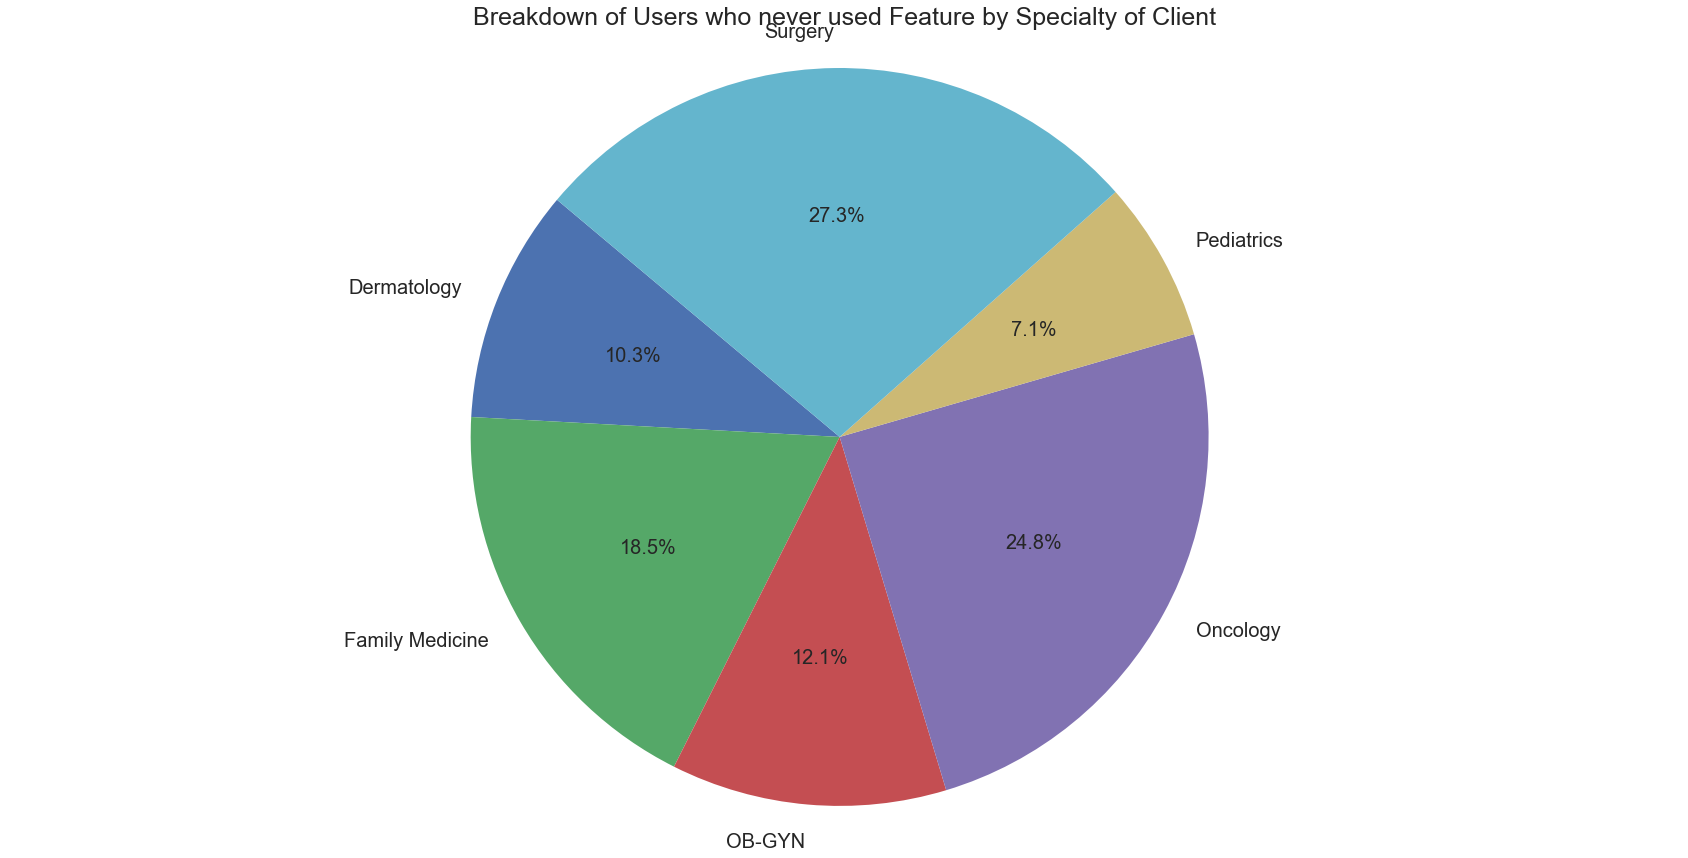

In [643]:
fig, ax = plt.subplots(figsize=(30,15))

client_byspec_no_new_feature_used = client_no_new_feature_used.groupby(['CLIENTSPECIALTY'], as_index=False)['CLIENTID'].count()

size = []
for i in client_byspec_no_new_feature_used['CLIENTID']:
    size.append(i)
    
labels = []
for i in client_byspec_no_new_feature_used['CLIENTSPECIALTY']:
    labels.append(i)

wedges, texts, autotext = ax.pie(size, labels= labels,autopct='%1.1f%%', startangle=140)

plt.title('Breakdown of Users who never used Feature by Specialty of Client', fontsize = 25)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
texts[3].set_fontsize(20)
texts[4].set_fontsize(20)
texts[5].set_fontsize(20)
                      
autotext[0].set_fontsize(20)
autotext[1].set_fontsize(20)
autotext[2].set_fontsize(20)
autotext[3].set_fontsize(20)
autotext[4].set_fontsize(20)
autotext[5].set_fontsize(20)

plt.axis("equal")
plt.show()

In [710]:
plt.close('all')

ClientSpecialty,Dermatology,Family Medicing,OB-GYN,Oncology,Pediatrics,Surgery
Week,,,,,,
2017-11-20,62.5,60,83.3333,58.6207,85.3659,70.8333
2017-11-27,71.4286,50,64.2857,61.8182,81.25,67.8571
2017-12-04,62,62.5,64.7059,62.9032,73.9726,61.6162
2017-12-11,73.3333,44.898,58.9744,68.5714,83.8235,67.7419
2017-12-18,77.551,58.3333,66.6667,67.1233,79.7468,67.4157
2017-12-25,63.4615,46.1538,48.6486,56.9444,80.8824,73.8095
2018-01-01,71.1111,60,53.8462,70,70.6667,67.7778
2018-01-08,63.4615,70,66.6667,69.863,77.2727,72.8261
